#### Problem Statement

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection  import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn import metrics
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("C:/Users/Hrushikesh/Desktop/global-power-plant-database-master/source_databases_csv/database_IND.csv")
data

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The dataset contains the records of 35,000 power plants from 167 countries and include thermal power plant. the data set has 25 variables including the features and target variables. In this data set we need to predict primary fuel and capacity_mw so these two are our target variables

In [3]:
data.shape

(908, 25)

There are 908 rows and 25 columns in this dataset

In [4]:
data.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

The datset has 13 float datatypes i.e. numeric data variables and 12 object datatype i.e. catrgorical data variables

#### Numerical Variables

- capacity_mw
- latitude
- longitude
- other_fuel3
- commissioning_year
- wepp_id
- year of capacity_data
- generation_gwh_2013
- generation_ghh_2014
- generation_gwh_2015
- generation_gwh_2016
- generation_gwh_2017
- estimated_generation_gwh

#### Categorical Variables

- country
- country_long
- name
- gppd_idnr
- primary_fuel
- other_fuel1
- other_fuel2
- owner
- source
- url
- geolocation_source
- generation_data_source

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

In [6]:
data.nunique()

country                       1
country_long                  1
name                        908
gppd_idnr                   908
capacity_mw                 365
latitude                    837
longitude                   828
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013         364
generation_gwh_2014         374
generation_gwh_2015         398
generation_gwh_2016         405
generation_gwh_2017         410
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

In [7]:
data['country'].value_counts()

IND    908
Name: country, dtype: int64

There is only one country in the data so we can drop this as it is irrelevant for column prediction

In [8]:
data.drop(columns=["country","country_long"],axis=1,inplace=True)

In [9]:
data.drop(columns=["other_fuel2","year_of_capacity_data","generation_data_source","other_fuel3","wepp_id","estimated_generation_gwh"],axis=1,inplace=True)

In [10]:
data['name'].value_counts()

Mirpur Kalan - Alianz Eco Solar Power Plant    1
DHUVARAN CCPP                                  1
UNO SUGEN                                      1
SANGLI KRANTI                                  1
WADI CEMENT PLANT                              1
                                              ..
GAJ                                            1
CHIBRO (YAMUNA)                                1
TROMBAY_Coal                                   1
K_GUDEM                                        1
MEJIA TPS EXT                                  1
Name: name, Length: 908, dtype: int64

Name column has unique names for each power plant so we can drop this column.

In [11]:
data.drop("name",axis=1,inplace=True)

In [12]:
data["gppd_idnr"].value_counts()

IND0000399    1
WRI1019988    1
WRI1026667    1
WRI1026757    1
WRI1020004    1
             ..
WRI1026344    1
IND0000130    1
IND0000533    1
WRI1026104    1
IND0000535    1
Name: gppd_idnr, Length: 908, dtype: int64

The column gppd_idnr also contain the unique ID of the power plant, So we can drop this column as well.

In [13]:
data.drop("gppd_idnr",axis=1,inplace=True)

The column owner has maximum number of null values. so we can drop this column as it is irrelevant.

In [14]:
data.drop("owner",axis=1,inplace=True)

We can also drop the column Url also.

In [15]:
data.drop("url",axis=1,inplace=True)

In [16]:
data.isna().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2013    524
generation_gwh_2014    507
generation_gwh_2015    483
generation_gwh_2016    471
generation_gwh_2017    465
dtype: int64

We can see huge number of missing values. We will fill them using imputation techniques after checking skewness in these columns.

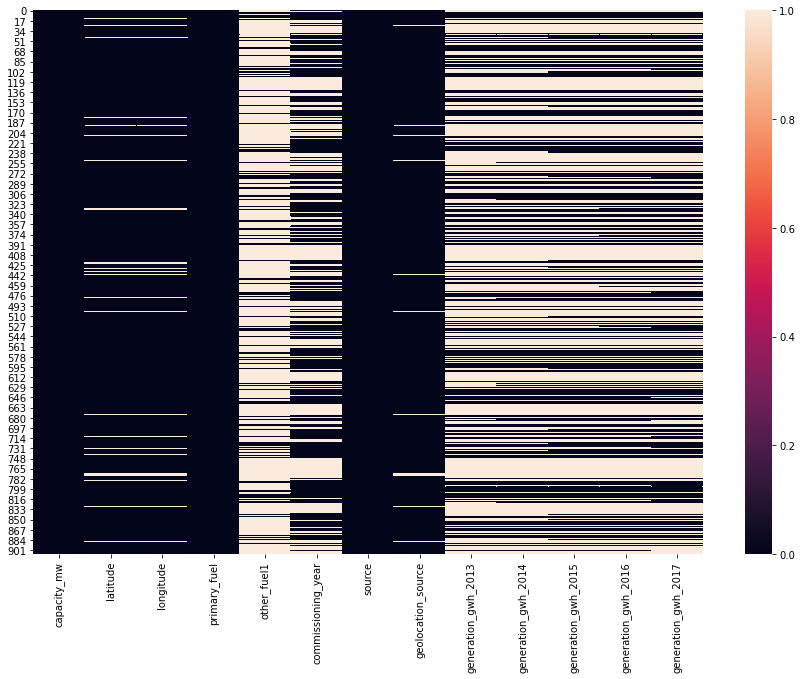

In [17]:
plt.figure(figsize=(15,10))
sns.heatmap(data.isna())
plt.show()

We can clearly observe the white lines in the heatmap which represents the missing values in the dataset.

# Handling Null Values

In [18]:
data.skew()

capacity_mw            3.193257
latitude              -0.143622
longitude              1.100942
commissioning_year    -1.056132
generation_gwh_2013    3.416338
generation_gwh_2014    3.357683
generation_gwh_2015    3.679016
generation_gwh_2016    3.524785
generation_gwh_2017    3.576849
dtype: float64

- Most of te columns of missing values except target and features.
- The columns logitude,commissioning year, generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017 are numerical type and have huge outliers and skewness, so will replace these columns with median

In [19]:
# Filling null values using their median values
data['longitude']=data['longitude'].fillna(data['longitude'].median())
data['commissioning_year']=data['commissioning_year'].fillna(data['commissioning_year'].median())
data['generation_gwh_2013']=data['generation_gwh_2013'].fillna(data['generation_gwh_2013'].median())
data['generation_gwh_2014']=data['generation_gwh_2014'].fillna(data['generation_gwh_2014'].median())
data['generation_gwh_2015']=data['generation_gwh_2015'].fillna(data['generation_gwh_2015'].median())
data['generation_gwh_2016']=data['generation_gwh_2016'].fillna(data['generation_gwh_2016'].median())
data['generation_gwh_2017']=data['generation_gwh_2017'].fillna(data['generation_gwh_2017'].median())

The column latitude has a numerical data and has no skewness and outliers so we can use mean method


In [20]:
data["latitude"]=data['latitude'].fillna(data['latitude'].mean())

The features other_fuel1 and geolocation_source have categorical data so we can fill the null values using mode methods


In [21]:
data['other_fuel1'].mode()

0    Oil
dtype: object

In [22]:
data['geolocation_source'].mode()

0    WRI
dtype: object

In [23]:
data['other_fuel1'] = data['other_fuel1'].fillna(data['other_fuel1'].mode()[0])

In [24]:
data['geolocation_source']= data['geolocation_source'].fillna(data['geolocation_source'].mode()[0])

<AxesSubplot:>

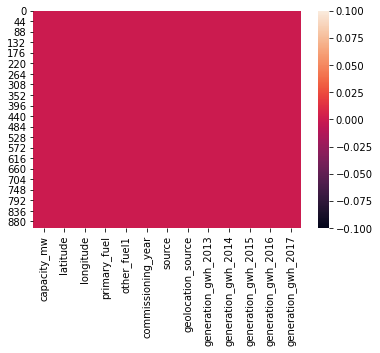

In [25]:
sns.heatmap(data.isna())

We can visalize no missing values left in the dataset

In [26]:
data['capacity_mw'].value_counts()

5.0       39
10.0      22
600.0     21
15.0      20
1200.0    19
          ..
26.4       1
68.8       1
91.8       1
1.8        1
816.4      1
Name: capacity_mw, Length: 365, dtype: int64

These are the  values present in the capacity_mw column

In [27]:
data['primary_fuel'].value_counts()

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

These are the list of values present in the column primary_fuel


In [28]:
data['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [29]:
data['commissioning_year'].value_counts()

2000.0    396
2013.0     28
2015.0     26
2012.0     23
2016.0     21
         ... 
1958.0      1
1949.0      1
1954.0      1
1956.0      1
1927.0      1
Name: commissioning_year, Length: 73, dtype: int64

In [30]:
data['power_plant_age'] = 2018 - data['commissioning_year']
data.drop(columns=['commissioning_year'],inplace=True)

Here i have extracted power plant age from commissioning year and dropped commissioning year columns. From Power plant age we can get to know how old the power plants are.

In [31]:
data.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,power_plant_age
0,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,797.063475,805.760000,701.02725,716.728350,807.601700,7.0
1,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,WRI,797.063475,805.760000,701.02725,716.728350,807.601700,18.0
2,39.2,21.9038,69.3732,Wind,Oil,CDM,WRI,797.063475,805.760000,701.02725,716.728350,807.601700,18.0
3,135.0,23.8712,91.3602,Gas,Oil,Central Electricity Authority,WRI,631.777928,617.789264,843.74700,886.004428,663.774500,14.0
4,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,WRI,1668.290000,3035.550000,5916.37000,6243.000000,5385.579736,3.0


In [32]:
data.loc[data['capacity_mw']==" "]

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,power_plant_age


There are no spaces in the data set

In [33]:
data.describe()

,capacity_mw,latitude,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,power_plant_age
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,321.046378,21.196189,77.410936,1434.383254,1518.830440,1502.838018,1552.807503,1648.790766,19.816079
std,580.221767,6.088110,4.783873,2575.982982,2783.474774,2985.277178,3006.880849,3047.577626,13.085938
min,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,17.057825,74.390250,797.063475,805.760000,701.027250,716.728350,807.601700,15.000000
50%,60.000000,21.278850,76.719250,797.063475,805.760000,701.027250,716.728350,807.601700,18.000000
75%,388.125000,25.183775,79.211600,797.063475,805.760000,701.027250,716.728350,807.601700,21.000000
max,4760.000000,34.649000,95.408000,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,91.000000


This gives the statistical summary of the data set
- The count of the columns are same which means there is no missing value present in the data sets
- The mean is more than median in all columns except latitude which means they are skewed to the right
- the median is beat greater than mean in the column latitude which means it is skewed to the left
- from the difference between the max and 75 percentile we can say that there are huge outliers present in the most of the columns will remove the them before the model building building



### Separating categorical and numerical columns

In [34]:
# Checking for Categirical columns
Categorical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]=='object':
        Categorical_col.append(i)
print(Categorical_col)

['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']


In [35]:
# Checking for Numerical columns
Numerical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]!='object':
        Numerical_col.append(i)
print(Numerical_col)

['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'power_plant_age']


# Data Visualization

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64


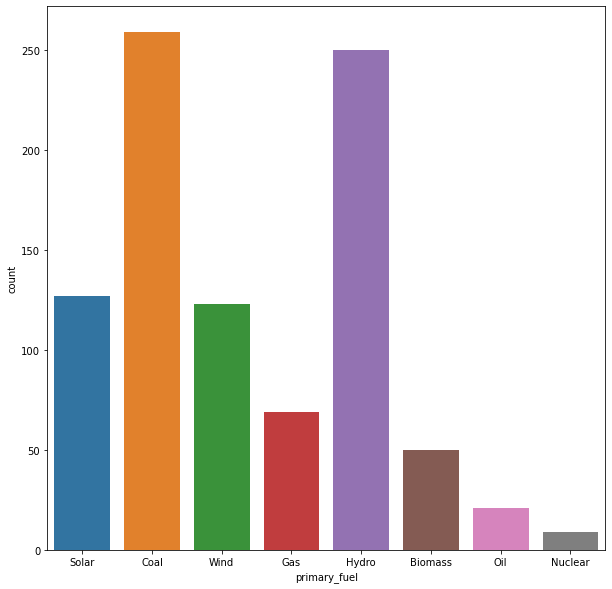

In [36]:
print(data['primary_fuel'].value_counts())
plt.figure(figsize=(10,10))
sns.countplot(data['primary_fuel'])
plt.show()

The count plot choose the energy source used in a primary electricity generation. Here using the source coal generates more electricity followed by hydro. Also the energy source nuclear generates very less electricity compares to others.

Oil             905
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64


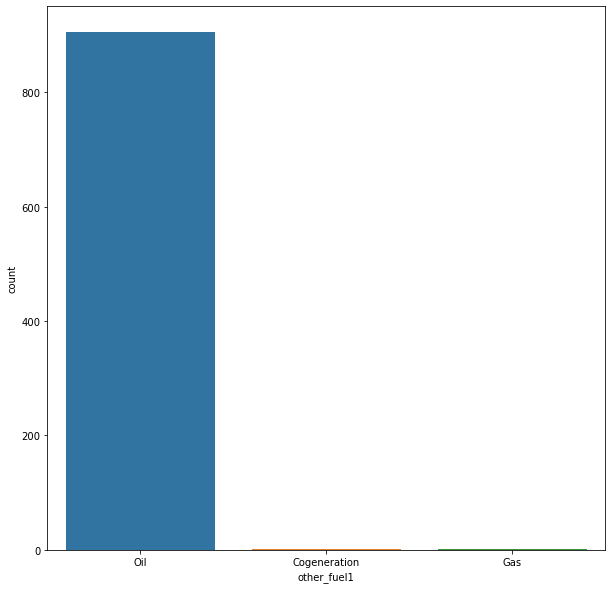

In [37]:
print(data['other_fuel1'].value_counts())
plt.figure(figsize=(10,10))
sns.countplot(data['other_fuel1'])
plt.show()

There are three unique values in the other fuel one. Here as we can see the count of oil is high as compared to cogeneration and gas

WRI                                     785
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


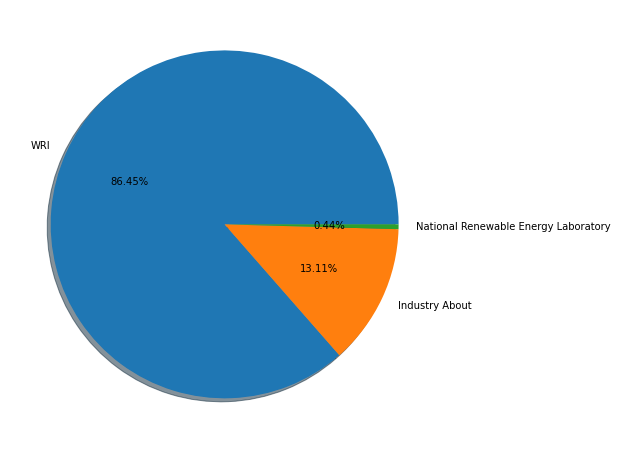

In [38]:
print(data['geolocation_source'].value_counts())
labels = 'WRI','Industry About','National Renewable Energy Laboratory'
fig, ax = plt.subplots(figsize=(10,8))
ax.pie(data['geolocation_source'].value_counts(), labels=labels, autopct='%1.2f%%',shadow=True)
plt.show()

As the plot shows the geological source WRI has highest counts which means WRI gives the more geological information compares to other two sources

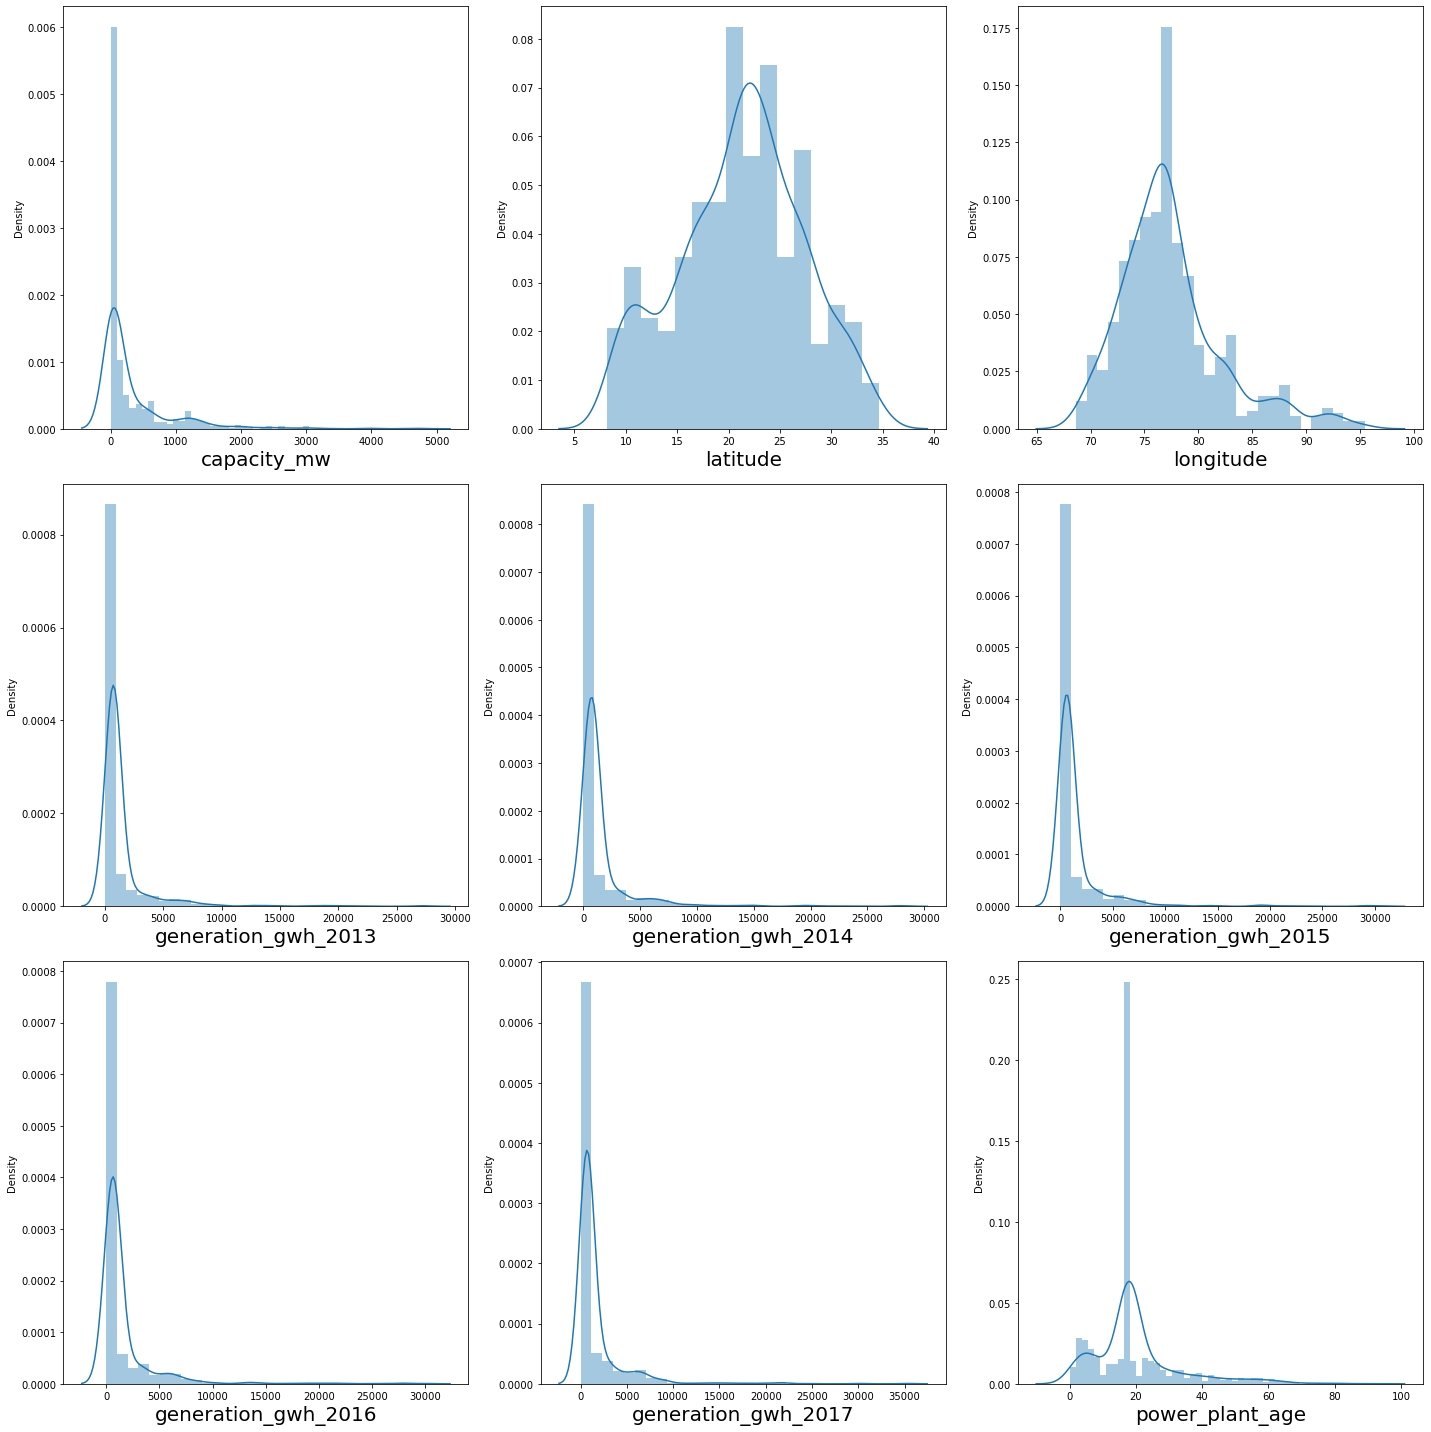

In [39]:
# Distribution of skewness
plt.figure(figsize=(20,20), facecolor='white')
plotnumber = 1

for column in Numerical_col:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

- from the above distribution plot we can observe that the data is not normally distributed in all the columns except latitude and longitude

- in most of the problems and mean is better than median which means they ask you to write

- we will remove the skewness in all columns except the labels later


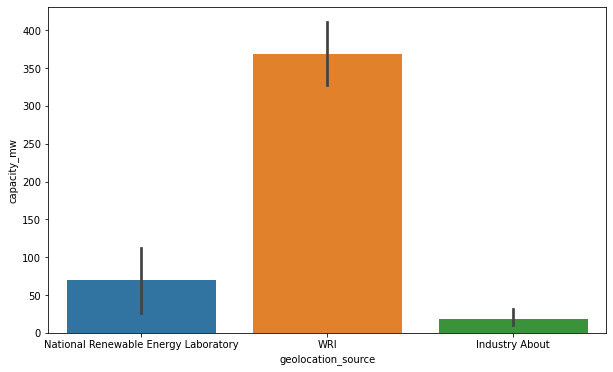

In [40]:
plt.figure(figsize=(10,6))
sns.barplot(x = "geolocation_source", y = "capacity_mw", data=data)
plt.show()


The capacity of  geological source WRI is maximum which has a capacity more than 350 mwgawatts. The geological source industry about has less capacity

<AxesSubplot:title={'center':'Comarision between Power_plant_age and capacity_mw'}, xlabel='power_plant_age', ylabel='capacity_mw'>

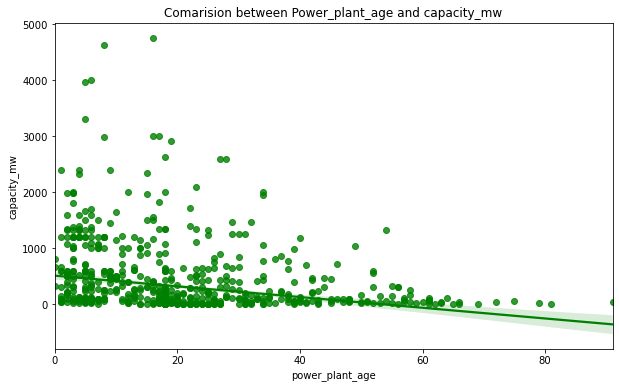

In [41]:
plt.figure(figsize=(10,6))
plt.title('Comarision between Power_plant_age and capacity_mw')
sns.regplot(data['power_plant_age'],data['capacity_mw'],color='g')

from the plot we can observe that there is a negative relationship between features and label. We can say that the capacity of older plant is very less than compared to the power plants which are stated recently.

<AxesSubplot:title={'center':'Comparison between latitude and capacity_mw'}, xlabel='latitude', ylabel='capacity_mw'>

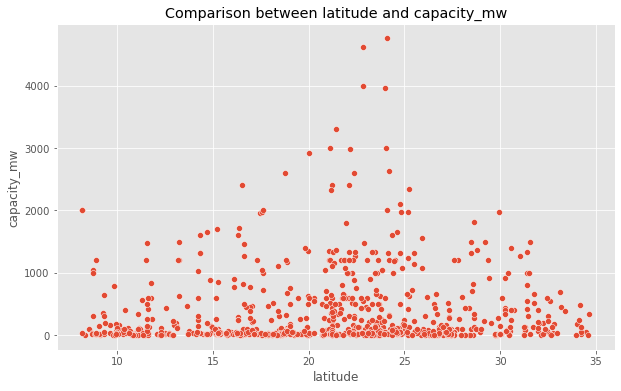

In [42]:
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparison between latitude and capacity_mw')
sns.scatterplot(data['latitude'],data['capacity_mw'])

The plant shows that there is no linear relationship between latitude and capacity of the power plant

<AxesSubplot:title={'center':'Comarision between latitude and capacity_mw'}, xlabel='latitude', ylabel='capacity_mw'>

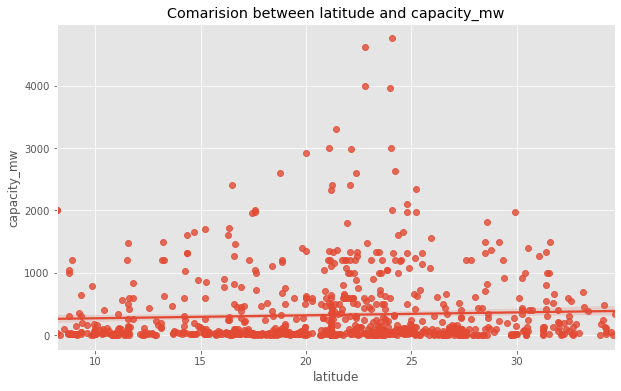

In [43]:
plt.figure(figsize=(10,6))
plt.style.use('ggplot')
plt.title('Comarision between latitude and capacity_mw')
sns.regplot(data['latitude'],data['capacity_mw'])

There is a week linear relationship between longitude and capacity

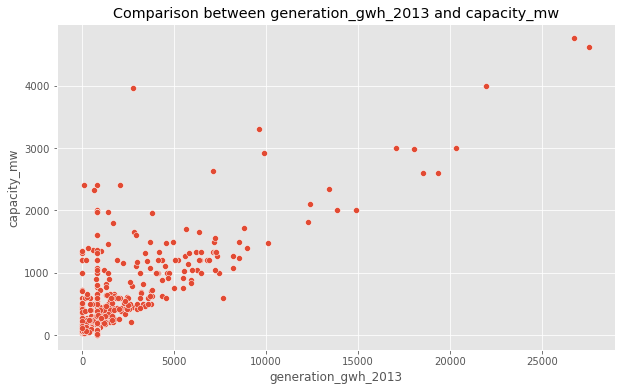

In [44]:
plt.figure(figsize=[10,6])
plt.title('Comparison between generation_gwh_2013 and capacity_mw')
sns.scatterplot(x="generation_gwh_2013",y="capacity_mw",data=data)
plt.show()

We have noticed the relationship between the features and labels. Here the electricity generation reported for the year 2013 has capacity above 1000mw. As the generation growth increases the capacity plant also increases

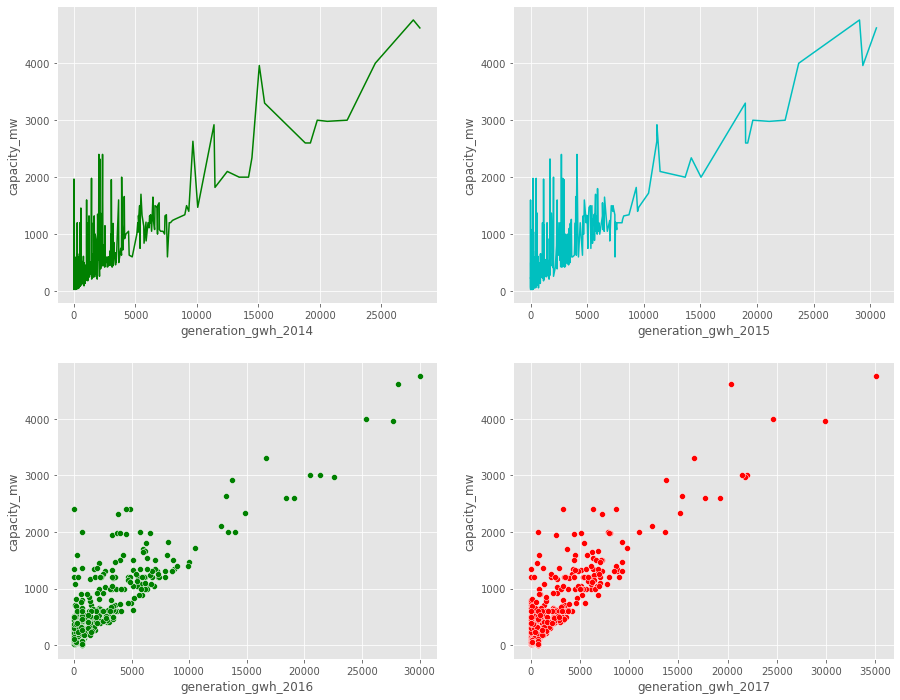

In [45]:
fig,axes=plt.subplots(2,2,figsize=(15,12))
sns.lineplot(x='generation_gwh_2014',y='capacity_mw',ax=axes[0,0],data=data,color='g')
sns.lineplot(x='generation_gwh_2015',y='capacity_mw',ax=axes[0,1],data=data,color='c')
sns.scatterplot(x='generation_gwh_2016',y='capacity_mw',ax=axes[1,0],data=data,color='g')
sns.scatterplot(x='generation_gwh_2017',y='capacity_mw',ax=axes[1,1],data=data,color='r')
plt.show()

#### From the above graph we can observe that

- There is a positive relationship between capacity and electricity generation report for the year mentioned.

- The plot shows the electricity generation report for the year 2014,2015,2016 and 2017 have high capacity of above 1000 megawatt. Also the power generation growth is more than 5000gwh in all the years.

- As the electricity generation growth increases, the capacity of the plant also increases


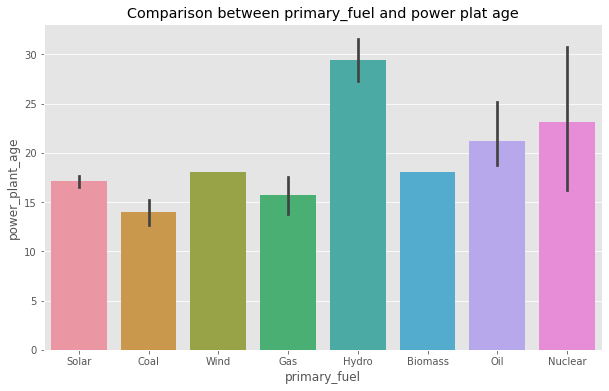

In [46]:
plt.figure(figsize=(10,6))
plt.title("Comparison between primary_fuel and power plat age")
sns.barplot(x = "primary_fuel", y = "power_plant_age", data=data)
plt.show()

- From the above lot we can order that most of the power plants uses hydro motor to generate electricity followed by nuclear and oil

- the power plant which are recently constructed uses coal solar and gas to generate the power


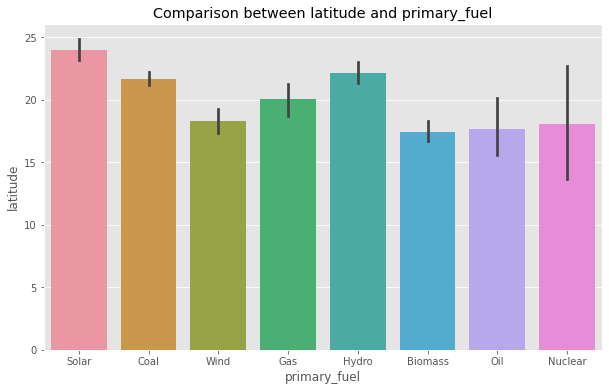

In [47]:
plt.figure(figsize=(10,6))
plt.title("Comparison between latitude and primary_fuel")
sns.barplot(x = "primary_fuel", y = "latitude", data=data)
plt.show()

- The primary fuel solar has high latitude of above 20 followed by hydro pole and gas whereas other fuels have less latitude


<AxesSubplot:title={'center':'Comarision between longitude and primary_fuel'}, xlabel='primary_fuel', ylabel='longitude'>

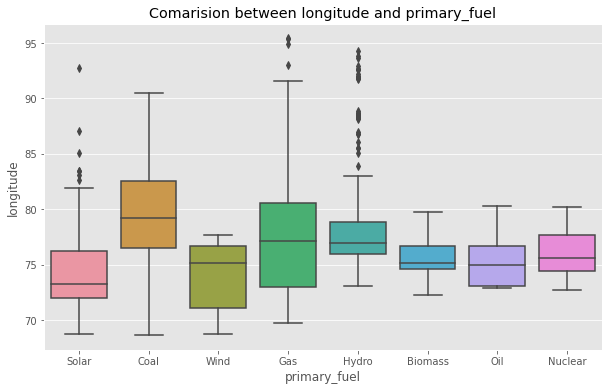

In [48]:
plt.figure(figsize=(10,6))
plt.style.use('ggplot')
plt.title('Comarision between longitude and primary_fuel')
sns.boxplot(data['primary_fuel'],data['longitude'])

The primary_fuel gas has high longitude followed by hydro, solar and coal. Other fuels have less longitude


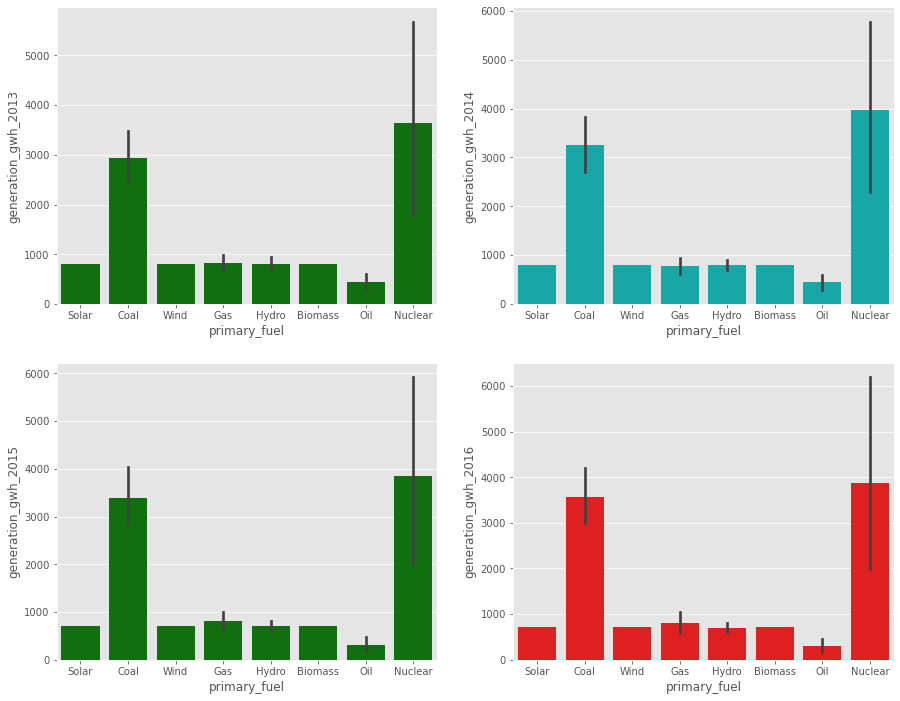

In [49]:
fig,axes=plt.subplots(2,2,figsize=(15,12))
sns.barplot(x='primary_fuel',y='generation_gwh_2013',ax=axes[0,0],data=data,color='g')
sns.barplot(x='primary_fuel',y='generation_gwh_2014',ax=axes[0,1],data=data,color='c')
sns.barplot(x='primary_fuel',y='generation_gwh_2015',ax=axes[1,0],data=data,color='g')
sns.barplot(x='primary_fuel',y='generation_gwh_2016',ax=axes[1,1],data=data,color='r')
plt.show()

- from the graph we can notice the primary fuel nuclear as high electrical generation reports for all the year followed by coal

- other fuel types have very less power generation report



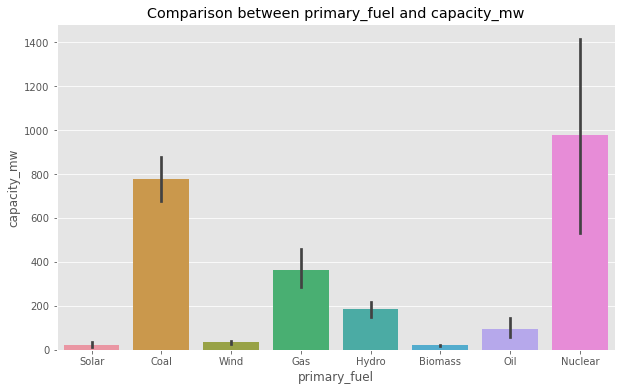

In [50]:
plt.figure(figsize=(10,6))
plt.title("Comparison between primary_fuel and capacity_mw")
sns.barplot(x = "primary_fuel", y = "capacity_mw", data=data)
plt.show()

- The plot shows the capacity of generating electricity is high in nuclear followed by the coal.

- Also the electricity generating capacity is very less in solar biomass wind and other plants

# Outliers

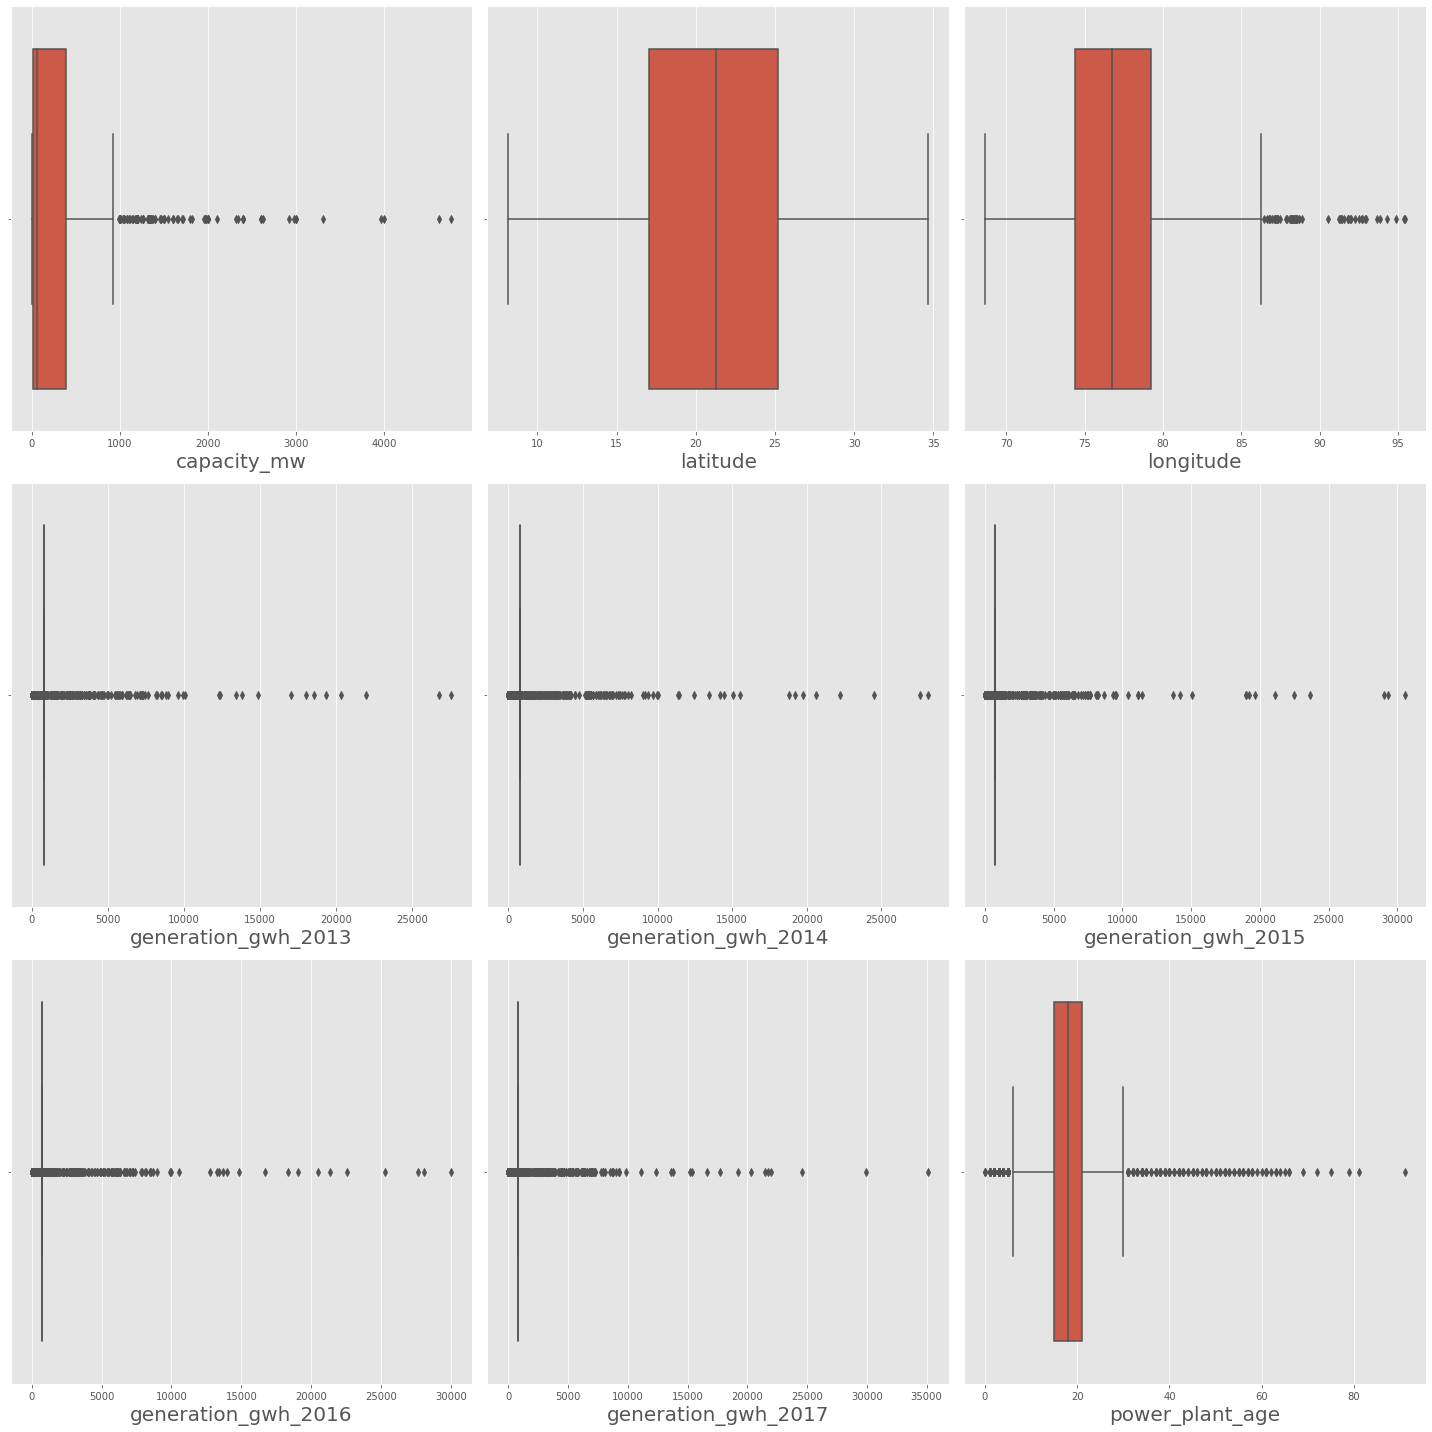

In [51]:
plt.figure(figsize=(20,20), facecolor='white')
plotnumber = 1

for column in Numerical_col:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

We can observe outliers present in all columns except latitude. Even the target column has outlier but no need to remove it

# Removing Outliers

In [52]:
from scipy.stats import zscore
features = data[['longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','power_plant_age']]
z = np.abs(zscore(features))
z

array([[0.87220856, 0.24754473, 0.25632114, ..., 0.27820854, 0.27617103,
        0.97991772],
       [0.58602743, 0.24754473, 0.25632114, ..., 0.27820854, 0.27617103,
        0.13885747],
       [1.68109953, 0.24754473, 0.25632114, ..., 0.27820854, 0.27617103,
        0.13885747],
       ...,
       [0.38271188, 0.24754473, 0.25632114, ..., 0.27820854, 0.27617103,
        0.13885747],
       [0.76616907, 0.24754473, 0.25632114, ..., 0.27820854, 0.27617103,
        0.13885747],
       [0.01377542, 0.24754473, 0.25632114, ..., 0.27820854, 0.27617103,
        0.13885747]])

In [53]:
new_data = data[(z<3).all(axis=1)]
new_data

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,power_plant_age
0,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,797.063475,805.760000,701.027250,716.728350,807.601700,7.0
1,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,WRI,797.063475,805.760000,701.027250,716.728350,807.601700,18.0
2,39.2,21.9038,69.3732,Wind,Oil,CDM,WRI,797.063475,805.760000,701.027250,716.728350,807.601700,18.0
3,135.0,23.8712,91.3602,Gas,Oil,Central Electricity Authority,WRI,631.777928,617.789264,843.747000,886.004428,663.774500,14.0
4,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,WRI,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,Coal,Oil,Central Electricity Authority,WRI,797.063475,805.760000,0.994875,233.596650,865.400000,2.0
904,3.0,12.8932,78.1654,Solar,Oil,Karnataka Power Corporation Limited,Industry About,797.063475,805.760000,701.027250,716.728350,807.601700,18.0
905,25.5,15.2758,75.5811,Wind,Oil,CDM,WRI,797.063475,805.760000,701.027250,716.728350,807.601700,18.0
906,80.0,24.3500,73.7477,Coal,Oil,Hindustan Zinc ltd,WRI,797.063475,805.760000,701.027250,716.728350,807.601700,18.0


In [54]:
print(data.shape)
print(new_data.shape)

(908, 13)
(852, 13)


In [55]:
loss = (908-852)/908*100
loss

6.167400881057269

Using Zscore method, the data loss is 6.16% lets check using IQR

In [56]:
# 1st quantile
Q1 = features.quantile(0.25)

# 3rd Quantile
Q3 = features.quantile(0.75)

#IQR
IQR = Q3-Q1

data1 = data[~((data<(Q1-1.5*IQR)) | (data>(Q3+1.5*IQR))).any(axis=1)]


In [57]:
print(data.shape)
print(data1.shape)

(908, 13)
(422, 13)


In [58]:
loss = (908-422)/908*100

In [59]:
loss

53.524229074889874

Using IQR method for data loss is more than 53%. So we will consider jet square method

# Encoding

In [60]:
from sklearn.preprocessing import LabelEncoder
categorical_col = ['primary_fuel','other_fuel1','source','geolocation_source']
lbl = LabelEncoder()
new_data[categorical_col]=new_data[categorical_col].apply(lbl.fit_transform)

In [61]:
new_data[categorical_col]

,primary_fuel,other_fuel1,source,geolocation_source
0,6,2,109,1
1,1,2,174,2
2,7,2,21,2
3,2,2,22,2
4,1,2,22,2
...,...,...,...,...
903,1,2,22,2
904,6,2,77,0
905,7,2,21,2
906,1,2,59,2


# Correlation

In [62]:
corr = new_data.corr()
corr

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,power_plant_age
capacity_mw,1.000000,0.047883,0.269970,-0.398618,-0.002132,-0.277952,0.236602,0.575972,0.627406,0.685477,0.761222,0.800618,-0.248690
latitude,0.047883,1.000000,-0.025155,-0.006130,0.036941,0.068515,-0.201910,0.074709,0.082205,0.071786,0.057760,0.070934,-0.084720
longitude,0.269970,-0.025155,1.000000,-0.388568,0.029138,-0.234616,0.264391,0.122737,0.126913,0.163771,0.207339,0.209047,-0.107977
primary_fuel,-0.398618,-0.006130,-0.388568,1.000000,0.006390,0.039078,-0.478338,-0.232343,-0.250540,-0.277754,-0.290226,-0.291655,0.087476
other_fuel1,-0.002132,0.036941,0.029138,0.006390,1.000000,0.028433,-0.022798,0.001675,-0.000346,0.005892,0.015135,0.011855,-0.055179
source,-0.277952,0.068515,-0.234616,0.039078,0.028433,1.000000,-0.498012,-0.135116,-0.141641,-0.157690,-0.161786,-0.158162,-0.056455
geolocation_source,0.236602,-0.201910,0.264391,-0.478338,-0.022798,-0.498012,1.000000,0.108337,0.113568,0.126437,0.129721,0.126815,0.035803
generation_gwh_2013,0.575972,0.074709,0.122737,-0.232343,0.001675,-0.135116,0.108337,1.000000,0.944730,0.845955,0.730317,0.660801,-0.012797
generation_gwh_2014,0.627406,0.082205,0.126913,-0.250540,-0.000346,-0.141641,0.113568,0.944730,1.000000,0.911892,0.800808,0.742744,-0.069265
generation_gwh_2015,0.685477,0.071786,0.163771,-0.277754,0.005892,-0.157690,0.126437,0.845955,0.911892,1.000000,0.907462,0.826148,-0.141499


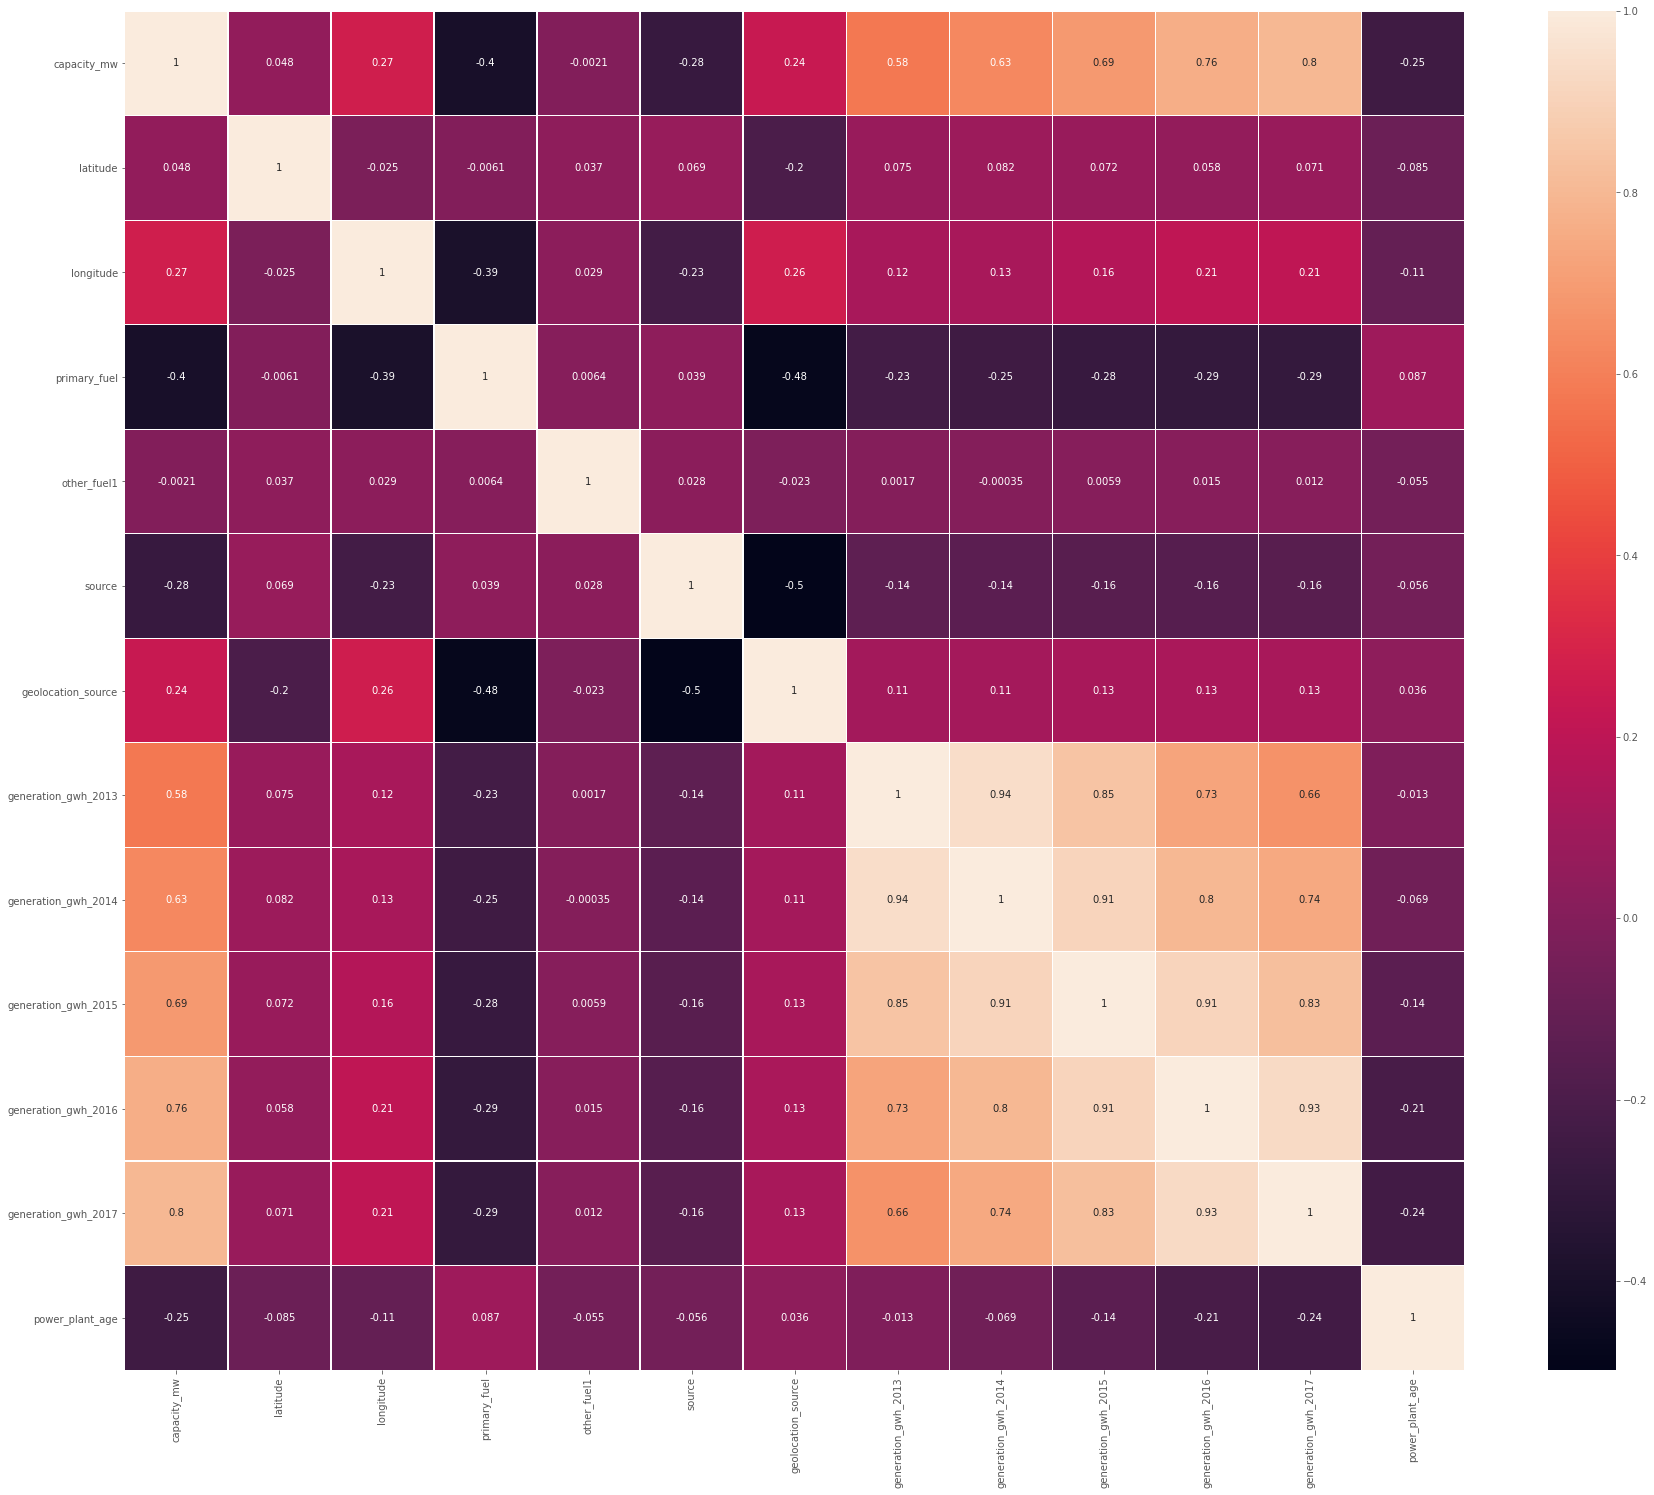

In [63]:
plt.figure(figsize=(30,25))
sns.heatmap(new_data.corr(),linewidths=.1,annot=True)
plt.show()

This heatmap contains both positive and negative correlation
#### Correlation between capacity_mw and features.

- The label capacity MB is highly positively correlated with features generation_gwh_2017,generation_gwh_2016,generation_gwh_2015,generation_gwh_2014,generation_gwh_2013.

- And the label is negatively correlated with the features primary_fuel source and power_plant_age.

- The column other_fuel1 and latitude have very less correlation with the label so we can drop them



#### Correlation between primary_fuel and features

- The label primary_fuel is less correlated with power_plant_age and source

- The label is  negatively correlated with the geological_source, longitude, capacity_mw, all generation_gws years.

- Also the feature other_fuel1 and latitude have very less correlation with both the lables. We can drop them


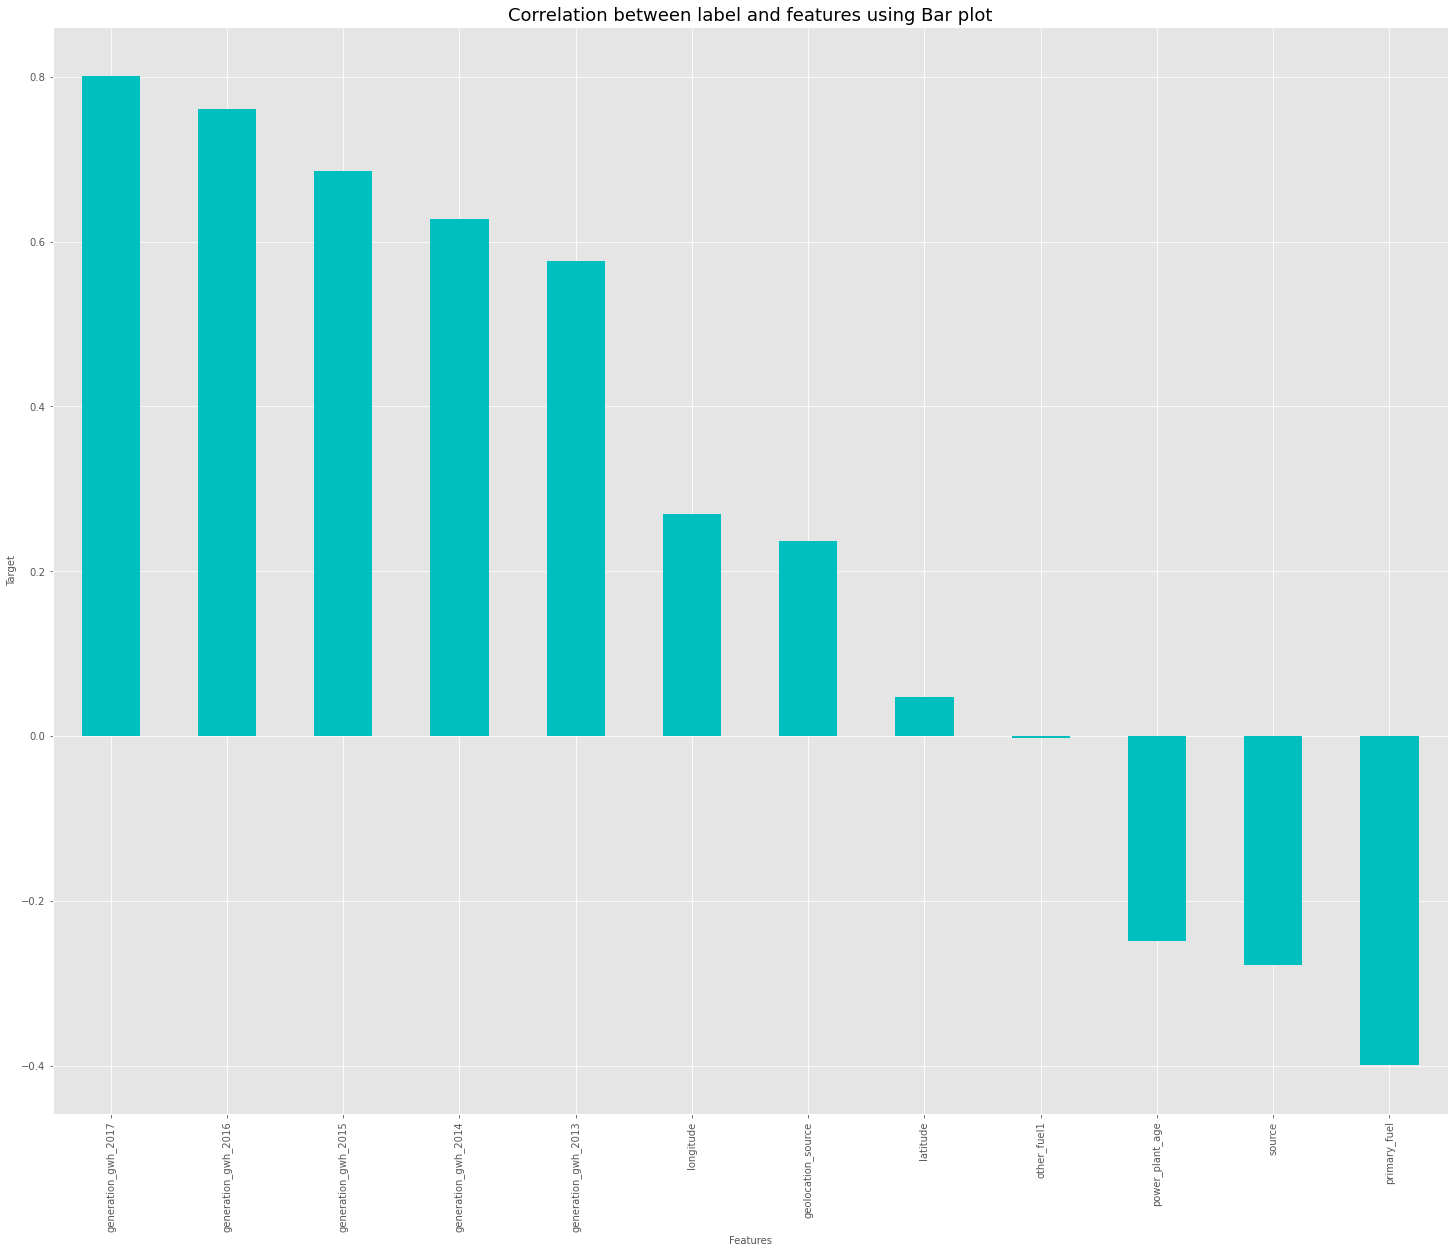

In [64]:
plt.figure(figsize=(25,20))
new_data.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=10)
plt.ylabel('Target',fontsize=10)
plt.title('Correlation between label and features using Bar plot', fontsize=18)
plt.show()

Here we can visualise the positive and negative relation between the features.

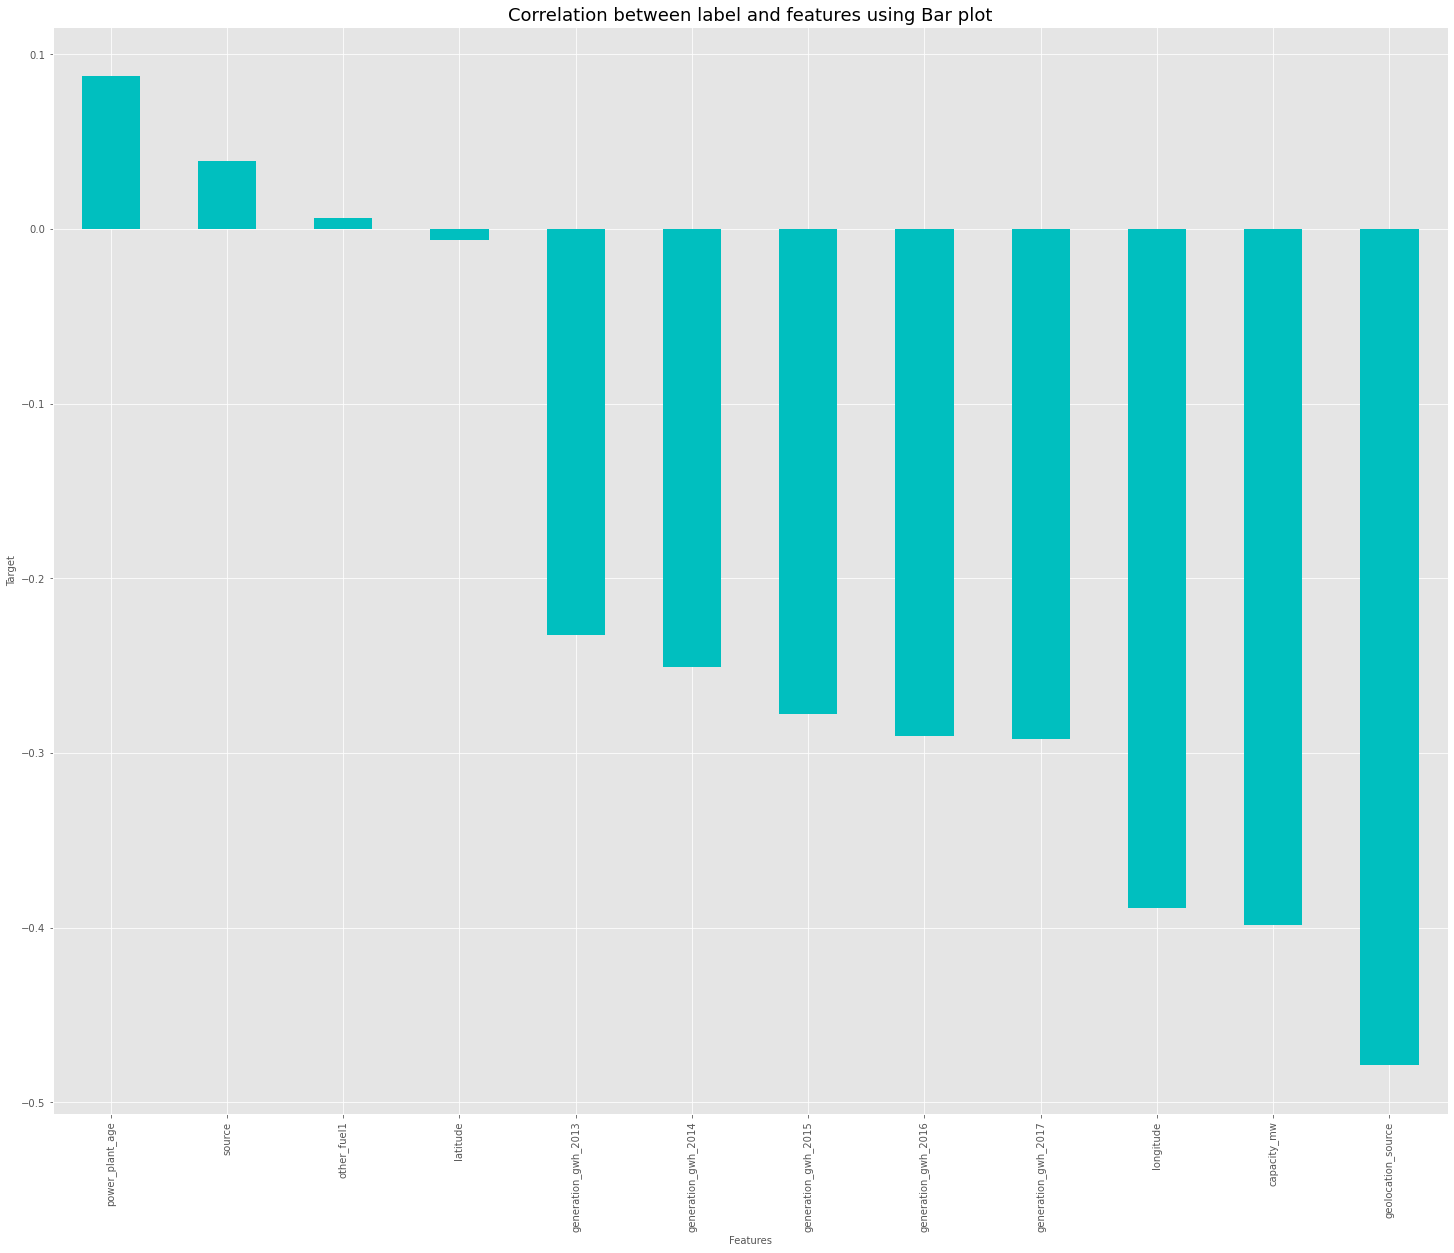

In [65]:
plt.figure(figsize=(25,20))
new_data.corr()['primary_fuel'].sort_values(ascending=False).drop(['primary_fuel']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=10)
plt.ylabel('Target',fontsize=10)
plt.title('Correlation between label and features using Bar plot', fontsize=18)
plt.show()

- Here from the both the bar plot we can observe that the column other_fuel one and latitude have very less correlation with Both the labels capacity_mw and primary_full. Let's drop these columns

In [66]:
new_data.drop("other_fuel1",axis=1,inplace=True)
new_data.drop("latitude",axis=1,inplace=True)

In [67]:
new_data.head()

,capacity_mw,longitude,primary_fuel,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,power_plant_age
0,2.5,73.2407,6,109,1,797.063475,805.760000,701.02725,716.728350,807.601700,7.0
1,98.0,74.6090,1,174,2,797.063475,805.760000,701.02725,716.728350,807.601700,18.0
2,39.2,69.3732,7,21,2,797.063475,805.760000,701.02725,716.728350,807.601700,18.0
3,135.0,91.3602,2,22,2,631.777928,617.789264,843.74700,886.004428,663.774500,14.0
4,1800.0,82.4091,1,22,2,1668.290000,3035.550000,5916.37000,6243.000000,5385.579736,3.0


# Predication for capacity_mw

#### Separating the features and labels

In [68]:
x = new_data.drop("capacity_mw",axis=1)
y = new_data['capacity_mw']

In [69]:
x.shape

(852, 10)

In [70]:
y.shape

(852,)

# Skewness

In [71]:
x.skew()

longitude              0.888694
primary_fuel           0.413982
source                 1.736117
geolocation_source    -2.068499
generation_gwh_2013    3.096648
generation_gwh_2014    2.940976
generation_gwh_2015    2.714988
generation_gwh_2016    2.635667
generation_gwh_2017    2.532066
power_plant_age        1.209638
dtype: float64

The following columns have skewness more than +0.5 and -0.5

- longitude
- generation_gwh_2013
- generation_gwh_2014
- generation_gwh_2015
- generation_gwh_2016
- generation_gwh_2017
- power_plant_age
- Also the column source and geological_source are categorical so no need to remove skewness in these columns.

In [72]:
skewed_features = ['longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','power_plant_age']



from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [73]:
x[skewed_features] = scaler.fit_transform(x[skewed_features].values)
x[skewed_features].head()

,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,power_plant_age
0,-0.924039,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,-1.138596
1,-0.500630,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.078356
2,-2.373612,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.078356
3,2.492970,-0.259129,-0.276296,0.101229,0.118902,-0.192428,-0.306973
4,1.285220,0.743909,1.423753,2.285309,2.271019,1.972415,-1.802274


In [74]:
x.skew()

longitude              0.000077
primary_fuel           0.413982
source                 1.736117
geolocation_source    -2.068499
generation_gwh_2013    0.278188
generation_gwh_2014    0.233082
generation_gwh_2015    0.162566
generation_gwh_2016    0.146869
generation_gwh_2017    0.125693
power_plant_age        0.037747
dtype: float64

The skewness has been removed in all the numerical columns.

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

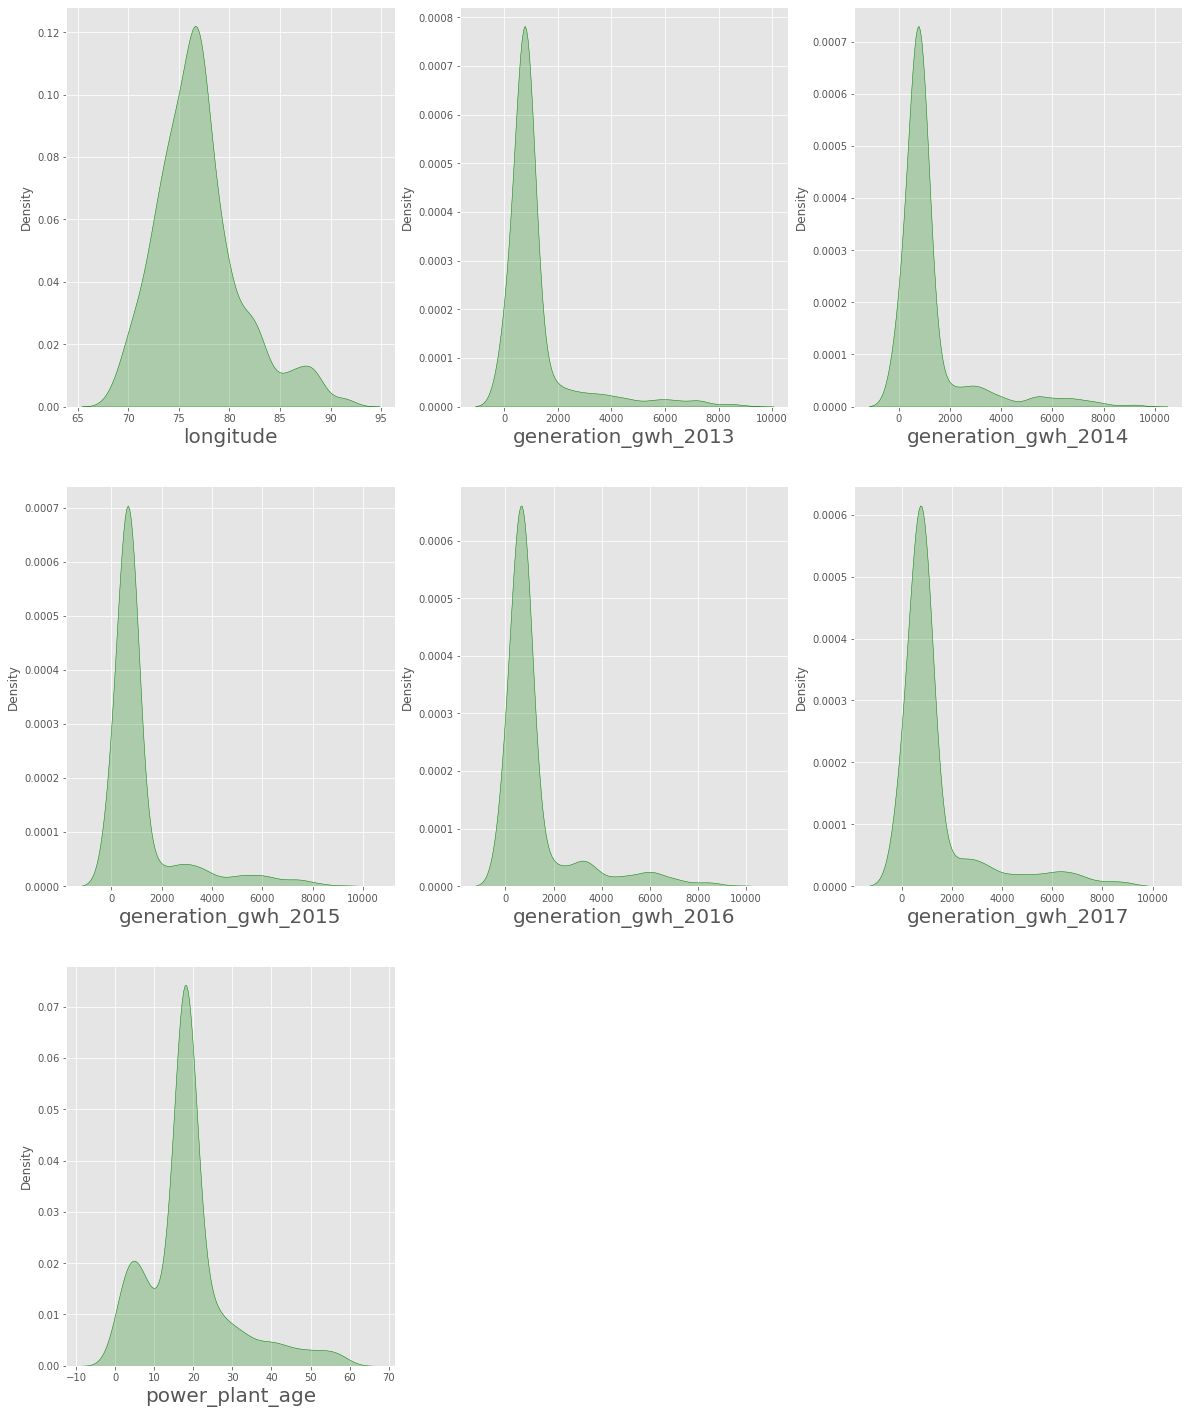

In [75]:
# Distribution of skewness
plt.figure(figsize=(20,25))
plotnumber = 1

for column in x[skewed_features]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(new_data[column],color='g',kde_kws={"shade":True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout

The data is not normal but the skewness has been removed in all the columns.

# StandardScaler

In [76]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x= pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,longitude,primary_fuel,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,power_plant_age
0,-0.924039,1.175664,1.399156,-1.037509,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,-1.138596
1,-0.500630,-0.973833,2.823623,0.406866,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.078356
2,-2.373612,1.605563,-0.529352,0.406866,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.078356
3,2.492970,-0.543934,-0.507437,0.406866,-0.259129,-0.276296,0.101229,0.118902,-0.192428,-0.306973
4,1.285220,-0.973833,-0.507437,0.406866,0.743909,1.423753,2.285309,2.271019,1.972415,-1.802274
...,...,...,...,...,...,...,...,...,...,...
847,0.237064,-0.973833,-0.507437,0.406866,-0.044354,-0.045943,-2.448545,-0.825789,0.016799,-2.017970
848,0.429134,1.175664,0.697881,-2.481884,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.078356
849,-0.223563,1.605563,-0.529352,0.406866,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.078356
850,-0.762359,-0.973833,0.303413,0.406866,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.078356


The data has been scaled using Standard Scalarization to overcome the problem of the data bianess.

# Multicolinearity


In [77]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,1.313067,longitude
1,1.687238,primary_fuel
2,1.502947,source
3,1.875104,geolocation_source
4,5.457906,generation_gwh_2013
5,7.210903,generation_gwh_2014
6,6.174992,generation_gwh_2015
7,9.656587,generation_gwh_2016
8,5.196305,generation_gwh_2017
9,1.127725,power_plant_age


Here we can observe all the columns have VIF less than 10 which there is no any problem of multicolinearity

# Modeling

In [78]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=i)
    mod = RandomForestRegressor()
    mod.fit(x_train,y_train)
    pred = mod.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("The Maximum r2_score is", maxAccu,"at random state",maxRS)

The Maximum r2_score is 0.8547735278235763 at random state 7


We are getting the maximum r2 score is 85% at random state 93

In [80]:
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=7)


# Regression Algorithm

In [81]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn import metrics

# RandomForestRegressor

In [82]:
RF = RandomForestRegressor()
RF.fit(x_train,y_train)
pred_RF = RF.predict(x_test)
print("R2_score:",r2_score(y_test,pred_RF))

# Mean  Absolute Error(MAE)
print('MAE:',metrics.mean_absolute_error(y_test,pred_RF))

# Mean Squared Error(MSE)
print('MSE:',metrics.mean_absolute_error(y_test,pred_RF))

# Root Mean Squared Error(RMSE)
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred_RF)))

R2_score: 0.8497357311535738
MAE: 85.88246708287109
MSE: 85.88246708287109
RMSE: 158.86914598782025


The r2_score value for Random Forest Regressor model is 84%

# DecisionTreeRegressor

In [83]:
DT = DecisionTreeRegressor()
DT.fit(x_train,y_train)
pred_DT = DT.predict(x_test)
print("R2_score:",r2_score(y_test,pred_DT))

# Mean  Absolute Error(MAE)
print('MAE:',metrics.mean_absolute_error(y_test,pred_DT))

# Mean Squared Error(MSE)
print('MSE:',metrics.mean_absolute_error(y_test,pred_DT))

# Root Mean Squared Error(RMSE)
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred_DT)))

R2_score: 0.6760761638650608
MAE: 116.36116276041666
MSE: 116.36116276041666
RMSE: 233.25617690668147


The R2_Score for Decision Tree Regressor is 67%

# KNN Regressor

In [84]:
knn = KNN()
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)
print("R2_score:",r2_score(y_test,pred_knn))

# Mean  Absolute Error(MAE)
print('MAE:',metrics.mean_absolute_error(y_test,pred_knn))

# Mean Squared Error(MSE)
print('MSE:',metrics.mean_absolute_error(y_test,pred_knn))

# Root Mean Squared Error(RMSE)
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred_knn)))

R2_score: 0.8025124881759524
MAE: 95.909903125
MSE: 95.909903125
RMSE: 182.13001307088297


The R2 Score using KNN Regressor is 80%

# GradientBoosting Regressor

In [85]:
GB = GradientBoostingRegressor()
GB.fit(x_train,y_train)
pred_GB = GB.predict(x_test)
print("R2_score:",r2_score(y_test,pred_GB))

# Mean  Absolute Error(MAE)
print('MAE:',metrics.mean_absolute_error(y_test,pred_GB))

# Mean Squared Error(MSE)
print('MSE:',metrics.mean_absolute_error(y_test,pred_GB))

# Root Mean Squared Error(RMSE)
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred_GB)))

R2_score: 0.8078472557073606
MAE: 97.31965950777787
MSE: 97.31965950777787
RMSE: 179.65321575532872


The R2 Score for GradientBoostingRegressor is 80%

# BaggingRegressor

In [86]:
BR = BaggingRegressor()
BR.fit(x_train,y_train)
pred_BR = BR.predict(x_test)
print("R2_score:",r2_score(y_test,pred_BR))

# Mean  Absolute Error(MAE)
print('MAE:',metrics.mean_absolute_error(y_test,pred_BR))

# Mean Squared Error(MSE)
print('MSE:',metrics.mean_absolute_error(y_test,pred_BR))

# Root Mean Squared Error(RMSE)
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred_BR)))

R2_score: 0.8209746768641424
MAE: 91.46563850983574
MSE: 91.46563850983574
RMSE: 173.40792154878469


The R2 Score for BaggingRegressor model is 82%

# Cross Validation

In [87]:
print("Cross_validation_Score Of RandomForestRegressor is:",cross_val_score(RF,x,y,cv=5).mean())
print("Cross_validation_Score Of DecisionTreeRegressor is:",cross_val_score(DT,x,y,cv=5).mean())
print("Cross_validation_Score Of Bagging Regressor is:",cross_val_score(BR,x,y,cv=5).mean())
print("Cross_validation_Score Of KNN is:",cross_val_score(knn,x,y,cv=5).mean())
print("Cross_validation_Score Of GradientBoostingRegressor is:",cross_val_score(GB,x,y,cv=5).mean())

Cross_validation_Score Of RandomForestRegressor is: 0.7781031131369288
Cross_validation_Score Of DecisionTreeRegressor is: 0.5732447746619715
Cross_validation_Score Of Bagging Regressor is: 0.7606186651863215
Cross_validation_Score Of KNN is: 0.7417542415978613
Cross_validation_Score Of GradientBoostingRegressor is: 0.761616716442653


From the above observation we can conclude that RandomForestRegressor is our best fit model

# Hyper Parameter Tuning

In [88]:
from sklearn.model_selection import GridSearchCV

In [89]:
parameters = {'criterion':['mse','mae'],
             'max_features':['auto','sqrt','log2'],
             'n_estimators':[0,200],
             'max_depth':[2,3,4,6]}

In [90]:
GCV = GridSearchCV(RandomForestRegressor(),parameters,cv=5)


In [91]:
GCV.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 3, 4, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [0, 200]})

In [92]:
GCV.best_params_


{'criterion': 'mae',
 'max_depth': 6,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [93]:
capacity = RandomForestRegressor(criterion='mae', max_depth=6,max_features='sqrt',n_estimators=200)
capacity.fit(x_train,y_train)
pred = capacity.predict(x_test)
print("RMSE value :",np.sqrt(metrics.mean_squared_error(y_test,pred_RF)))
print('R2_score :', r2_score(y_test,pred)*100)

RMSE value : 158.86914598782025
R2_score : 86.69646200259895


# Saving The Model

In [94]:
import joblib
joblib.dump(capacity,"Global_Power_plant_mw_pkl")

['Global_Power_plant_mw_pkl']

In [95]:
capacity = joblib.load("Global_Power_plant_mw_pkl")

In [96]:
a = np.array(y_test)
predicted = np.array(capacity.predict(x_test))
data_conclusion = pd.DataFrame({"Original":a, "Predicted":predicted}, index=range(len(a)))

data_conclusion

,Original,Predicted
0,26.000,20.731250
1,15.000,21.097500
2,18.000,20.731250
3,431.586,316.090768
4,186.200,331.523630
...,...,...
251,510.000,565.438250
252,30.000,76.488975
253,50.400,18.688750
254,99.000,90.556750


# Prediction for Primary_Fuel

In [97]:
x_data = new_data.drop("primary_fuel",axis=1)
y_data = new_data["primary_fuel"]

In [98]:
x_data.shape

(852, 10)

In [99]:
y_data.shape

(852,)

# Skewness

In [100]:
x_data.skew()

capacity_mw            2.134177
longitude              0.888694
source                 1.736117
geolocation_source    -2.068499
generation_gwh_2013    3.096648
generation_gwh_2014    2.940976
generation_gwh_2015    2.714988
generation_gwh_2016    2.635667
generation_gwh_2017    2.532066
power_plant_age        1.209638
dtype: float64

We can observe skewness in almost all the columns.So we will remove it except categorical columns.

In [101]:
skew = ["capacity_mw","longitude","generation_gwh_2013","generation_gwh_2014","generation_gwh_2015","generation_gwh_2016","generation_gwh_2017","power_plant_age"]



from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [102]:

x_data[skew] = scaler.fit_transform(x_data[skew].values)
x_data[skew].head()

,capacity_mw,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,power_plant_age
0,-1.675434,-0.924039,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,-1.138596
1,0.214717,-0.500630,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.078356
2,-0.280583,-2.373612,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.078356
3,0.386767,2.492970,-0.259129,-0.276296,0.101229,0.118902,-0.192428,-0.306973
4,1.740344,1.285220,0.743909,1.423753,2.285309,2.271019,1.972415,-1.802274


In [103]:
x_data.skew()

capacity_mw            0.013903
longitude              0.000077
source                 1.736117
geolocation_source    -2.068499
generation_gwh_2013    0.278188
generation_gwh_2014    0.233082
generation_gwh_2015    0.162566
generation_gwh_2016    0.146869
generation_gwh_2017    0.125693
power_plant_age        0.037747
dtype: float64

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

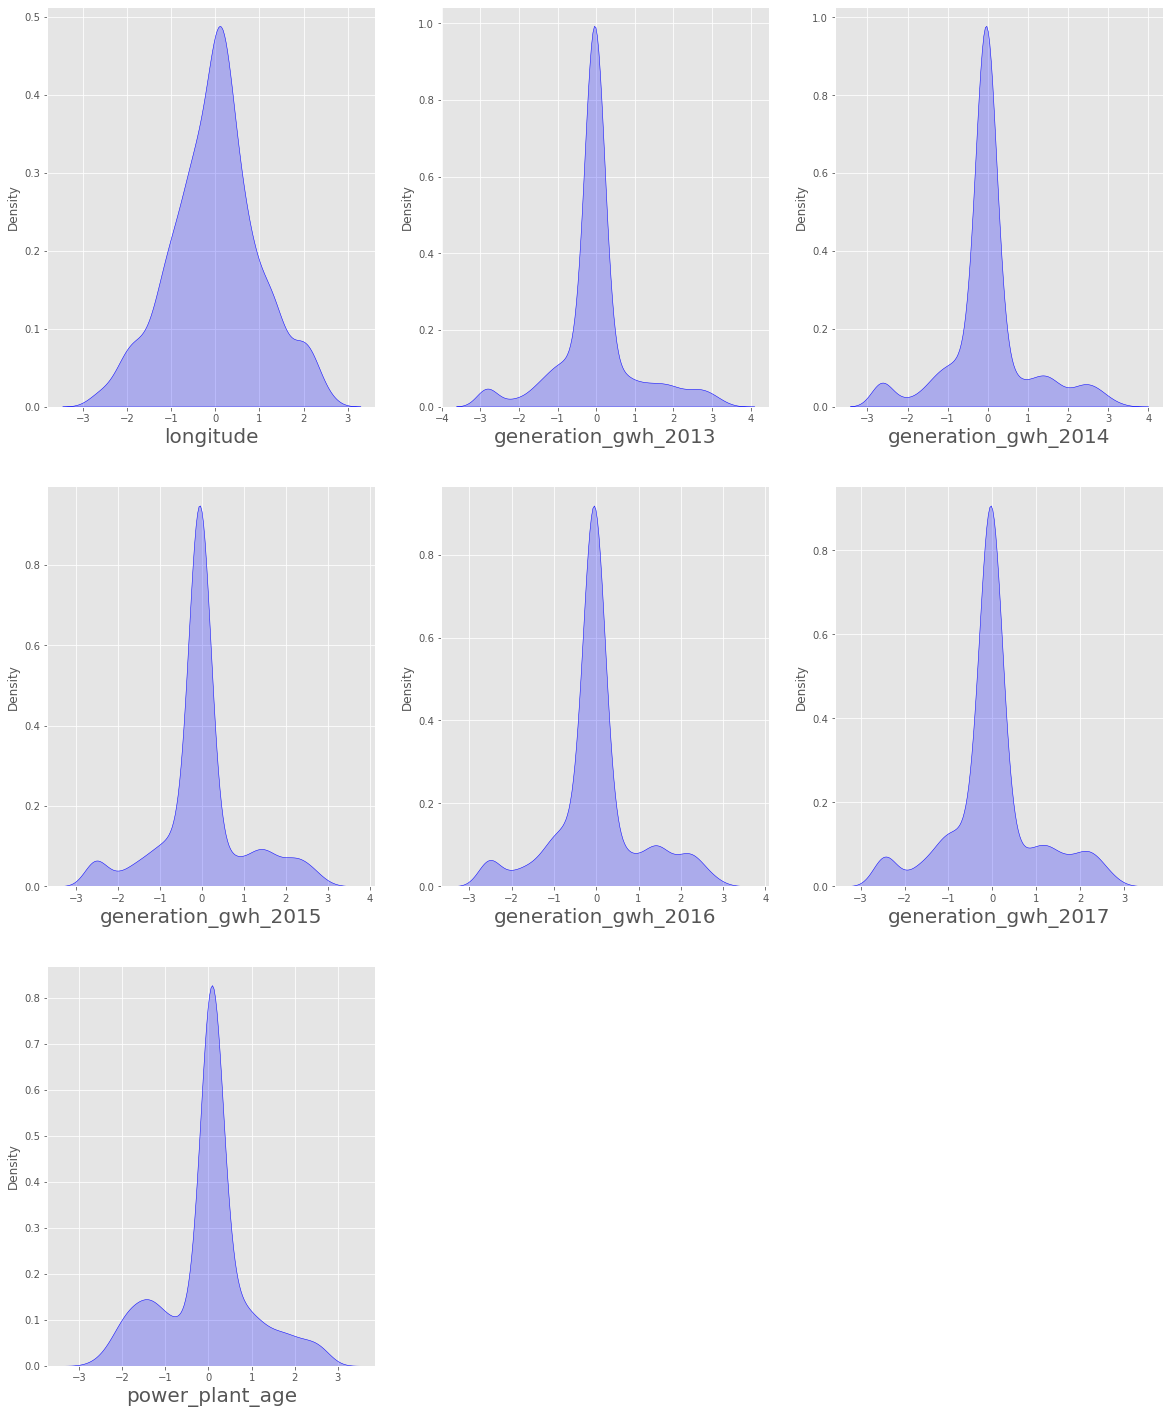

In [104]:
# Distribution of skewness
plt.figure(figsize=(20,25))
plotnumber = 1

for column in x_data[skewed_features]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x_data[column],color='b',kde_kws={"shade":True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout

The data is not normal but skewness has been removed

# Feature Scaling

In [105]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_data= pd.DataFrame(scaler.fit_transform(x_data),columns=x_data.columns)
x_data

,capacity_mw,longitude,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,power_plant_age
0,-1.675434,-0.924039,1.399156,-1.037509,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,-1.138596
1,0.214717,-0.500630,2.823623,0.406866,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.078356
2,-0.280583,-2.373612,-0.529352,0.406866,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.078356
3,0.386767,2.492970,-0.507437,0.406866,-0.259129,-0.276296,0.101229,0.118902,-0.192428,-0.306973
4,1.740344,1.285220,-0.507437,0.406866,0.743909,1.423753,2.285309,2.271019,1.972415,-1.802274
...,...,...,...,...,...,...,...,...,...,...
847,1.680420,0.237064,-0.507437,0.406866,-0.044354,-0.045943,-2.448545,-0.825789,0.016799,-2.017970
848,-1.597071,0.429134,0.697881,-2.481884,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.078356
849,-0.513131,-0.223563,-0.529352,0.406866,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.078356
850,0.105331,-0.762359,0.303413,0.406866,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.078356


# Multicolinearity

In [106]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x_data.values,i) for i in range(len(x_data.columns))]
vif['Features'] = x_data.columns
vif

,VIF values,Features
0,1.827367,capacity_mw
1,1.199592,longitude
2,1.412236,source
3,1.588651,geolocation_source
4,5.468598,generation_gwh_2013
5,7.212366,generation_gwh_2014
6,6.182418,generation_gwh_2015
7,9.655331,generation_gwh_2016
8,5.231173,generation_gwh_2017
9,1.182482,power_plant_age


The VIF value is less than 10 in all the columns which means no multicolinearity

In [107]:
y_data.value_counts()

1    240
3    218
6    126
7    123
2     65
0     50
5     21
4      9
Name: primary_fuel, dtype: int64

- Here we can observe that the target variable primary_fuel has multiclasses which means it is a multiclassification problem.

- Also the data is not balanced so we will use oversampling method to balance the data

# Oversampling

In [108]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x_data,y_data = SM.fit_resample(x_data,y_data)


In [109]:
y_data.value_counts()

0    240
1    240
2    240
3    240
4    240
5    240
6    240
7    240
Name: primary_fuel, dtype: int64

The data is balanced now

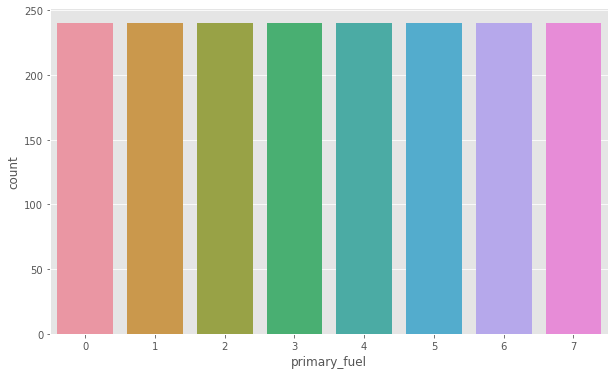

In [110]:
plt.figure(figsize=(10,6))
sns.countplot(y_data)
plt.show()

Here we can visualize the data in all the types are equal

In [111]:
x_data.head()

,capacity_mw,longitude,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,power_plant_age
0,-1.675434,-0.924039,1.399156,-1.037509,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,-1.138596
1,0.214717,-0.500630,2.823623,0.406866,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.078356
2,-0.280583,-2.373612,-0.529352,0.406866,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.078356
3,0.386767,2.492970,-0.507437,0.406866,-0.259129,-0.276296,0.101229,0.118902,-0.192428,-0.306973
4,1.740344,1.285220,-0.507437,0.406866,0.743909,1.423753,2.285309,2.271019,1.972415,-1.802274


# Modeling

In [112]:
from sklearn.model_selection import train_test_split as TTS
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_data_train,x_data_test,y_data_train,y_data_test = TTS(x_data,y_data,test_size=0.30,random_state=i)
    DT = DecisionTreeClassifier()
    DT.fit(x_data_train,y_data_train)
    pred = DT.predict(x_data_test)
    acc = r2_score(y_data_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("The best accuracy score is", maxAccu,"at random state",maxRS)

The best accuracy score is 0.9179552108886603 at random state 66


Best accuracy score is 91% at random state 66

In [115]:
    x_data_train,x_data_test,y_data_train,y_data_test = TTS(x_data,y_data,test_size=0.30,random_state=100)


# Classification Problem

In [116]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,BaggingClassifier

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score

# DecisionTreeClassifier

In [117]:
DT = DecisionTreeClassifier()
DT.fit(x_data_train,y_data_train)
predDT = DT.predict(x_data_test)
print(accuracy_score(y_data_test,predDT))
print(confusion_matrix(y_data_test,predDT))
print(classification_report(y_data_test,predDT))

0.8559027777777778
[[70  3  1  0  0  2  0  0]
 [ 3 48  6 11  9  1  0  0]
 [ 2  4 56  3  1  9  0  0]
 [ 0 10  7 37  2  0  0  0]
 [ 0  2  0  1 57  0  0  0]
 [ 2  2  1  1  0 73  0  0]
 [ 0  0  0  0  0  0 63  0]
 [ 0  0  0  0  0  0  0 89]]
              precision    recall  f1-score   support

           0       0.91      0.92      0.92        76
           1       0.70      0.62      0.65        78
           2       0.79      0.75      0.77        75
           3       0.70      0.66      0.68        56
           4       0.83      0.95      0.88        60
           5       0.86      0.92      0.89        79
           6       1.00      1.00      1.00        63
           7       1.00      1.00      1.00        89

    accuracy                           0.86       576
   macro avg       0.85      0.85      0.85       576
weighted avg       0.85      0.86      0.85       576



We are getting 88% Accuracy using DecisionTreeClassifier

# RandomForestClassifier

In [118]:
RF = RandomForestClassifier()
RF.fit(x_data_train,y_data_train)
predRF = RF.predict(x_data_test)
print(accuracy_score(y_data_test,predRF))
print(confusion_matrix(y_data_test,predRF))
print(classification_report(y_data_test,predRF))

0.9149305555555556
[[75  1  0  0  0  0  0  0]
 [ 4 59  3  5  7  0  0  0]
 [ 0  3 61  0  1 10  0  0]
 [ 0  8  4 43  1  0  0  0]
 [ 0  0  0  0 60  0  0  0]
 [ 0  1  0  1  0 77  0  0]
 [ 0  0  0  0  0  0 63  0]
 [ 0  0  0  0  0  0  0 89]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        76
           1       0.82      0.76      0.79        78
           2       0.90      0.81      0.85        75
           3       0.88      0.77      0.82        56
           4       0.87      1.00      0.93        60
           5       0.89      0.97      0.93        79
           6       1.00      1.00      1.00        63
           7       1.00      1.00      1.00        89

    accuracy                           0.91       576
   macro avg       0.91      0.91      0.91       576
weighted avg       0.91      0.91      0.91       576



We are getting 91% Accuracy using RandomForestClassifier

# SVC

In [119]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_data_train,y_data_train)
predsvc = svc.predict(x_data_test)
print(accuracy_score(y_data_test,predsvc))
print(confusion_matrix(y_data_test,predsvc))
print(classification_report(y_data_test,predsvc))

0.796875
[[67  0  0  0  0  2  0  7]
 [ 9 43  8  3  7  1  0  7]
 [ 1  7 43  2  3 16  0  3]
 [ 0 10 11 27  2  0  0  6]
 [ 0  0  0  0 60  0  0  0]
 [ 5  1  0  0  0 69  0  4]
 [ 0  0  0  0  0  0 63  0]
 [ 0  0  2  0  0  0  0 87]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        76
           1       0.70      0.55      0.62        78
           2       0.67      0.57      0.62        75
           3       0.84      0.48      0.61        56
           4       0.83      1.00      0.91        60
           5       0.78      0.87      0.83        79
           6       1.00      1.00      1.00        63
           7       0.76      0.98      0.86        89

    accuracy                           0.80       576
   macro avg       0.80      0.79      0.79       576
weighted avg       0.79      0.80      0.79       576



We are getting 80% Accuracy using SVC

# KNN

In [120]:
knn = KNN()
knn.fit(x_data_train,y_data_train)
predknn = knn.predict(x_data_test)
print(accuracy_score(y_data_test,predknn))
print(confusion_matrix(y_data_test,predknn))
print(classification_report(y_data_test,predknn))

0.8350694444444444
[[72  0  1  0  0  1  0  2]
 [ 8 42  8  3 12  2  0  3]
 [ 1  0 56  3  1 12  0  2]
 [ 0  9  7 34  3  0  0  3]
 [ 0  0  0  0 60  0  0  0]
 [ 5  0  2  0  0 70  0  2]
 [ 0  0  0  0  0  0 63  0]
 [ 0  0  0  4  0  1  0 84]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89        76
           1       0.82      0.54      0.65        78
           2       0.76      0.75      0.75        75
           3       0.77      0.61      0.68        56
           4       0.79      1.00      0.88        60
           5       0.81      0.89      0.85        79
           6       1.00      1.00      1.00        63
           7       0.88      0.94      0.91        89

    accuracy                           0.84       576
   macro avg       0.83      0.83      0.83       576
weighted avg       0.83      0.84      0.83       576



We are getting 86% accuracy sung KNN

In [121]:
GB = GradientBoostingClassifier()
GB.fit(x_data_train,y_data_train)
predGB = GB.predict(x_data_test)
print(accuracy_score(y_data_test,predGB))
print(confusion_matrix(y_data_test,predGB))
print(classification_report(y_data_test,predGB))

0.8854166666666666
[[73  2  0  0  0  1  0  0]
 [ 5 59  4  5  4  1  0  0]
 [ 2  3 57  7  1  5  0  0]
 [ 0 10  5 40  1  0  0  0]
 [ 0  0  2  1 57  0  0  0]
 [ 4  2  0  1  0 72  0  0]
 [ 0  0  0  0  0  0 63  0]
 [ 0  0  0  0  0  0  0 89]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91        76
           1       0.78      0.76      0.77        78
           2       0.84      0.76      0.80        75
           3       0.74      0.71      0.73        56
           4       0.90      0.95      0.93        60
           5       0.91      0.91      0.91        79
           6       1.00      1.00      1.00        63
           7       1.00      1.00      1.00        89

    accuracy                           0.89       576
   macro avg       0.88      0.88      0.88       576
weighted avg       0.88      0.89      0.88       576



We are getting 89% Accuracy using GradientBoostingClassifier

In [122]:
BC = BaggingClassifier()
BC.fit(x_data_train,y_data_train)
predBC = BC.predict(x_data_test)
print(accuracy_score(y_data_test,predBC))
print(confusion_matrix(y_data_test,predBC))
print(classification_report(y_data_test,predBC))

0.8940972222222222
[[72  2  0  0  0  2  0  0]
 [ 5 57  5  4  7  0  0  0]
 [ 1  3 59  3  1  8  0  0]
 [ 0  8  5 42  1  0  0  0]
 [ 0  0  0  1 59  0  0  0]
 [ 0  2  2  1  0 74  0  0]
 [ 0  0  0  0  0  0 63  0]
 [ 0  0  0  0  0  0  0 89]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.94        76
           1       0.79      0.73      0.76        78
           2       0.83      0.79      0.81        75
           3       0.82      0.75      0.79        56
           4       0.87      0.98      0.92        60
           5       0.88      0.94      0.91        79
           6       1.00      1.00      1.00        63
           7       1.00      1.00      1.00        89

    accuracy                           0.89       576
   macro avg       0.89      0.89      0.89       576
weighted avg       0.89      0.89      0.89       576



We are getting 90% Accuracy using Bagging Classifier

# Cross validation Score

In [123]:
print("Cross_validation_Score Of DecisionTreeClassifier is:",cross_val_score(DT,x_data,y_data,cv=5).mean())
print("Cross_validation_Score Of RandomForestClassifier is:",cross_val_score(RF,x_data,y_data,cv=5).mean())
print("Cross_validation_Score Of SVC is:",cross_val_score(svc,x_data,y_data,cv=5).mean())
print("Cross_validation_Score Of KNN is:",cross_val_score(knn,x_data,y_data,cv=5).mean())
print("Cross_validation_Score Of GradientBoostingClassifier is:",cross_val_score(GB,x_data,y_data,cv=5).mean())

Cross_validation_Score Of DecisionTreeClassifier is: 0.8552083333333332
Cross_validation_Score Of RandomForestClassifier is: 0.9140625
Cross_validation_Score Of SVC is: 0.7921875
Cross_validation_Score Of KNN is: 0.846875
Cross_validation_Score Of GradientBoostingClassifier is: 0.8927083333333334


Gradient Boosting Classifier is our best fit model

# Hyper Parameter Tuning

In [124]:
parameters = {'criterion':['friedman_mse','mse','mae'],
             'max_features':['auto','sqrt','log2'],
             'n_estimators':[0,200],
             'max_depth':[2,3,4,6,8]}

In [125]:
GCV = GridSearchCV(GradientBoostingClassifier(),parameters,cv=5)


In [126]:
GCV.fit(x_data_train,y_data_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'mse', 'mae'],
                         'max_depth': [2, 3, 4, 6, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [0, 200]})

In [128]:
GCV.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 6,
 'max_features': 'log2',
 'n_estimators': 200}

In [132]:
primary_fuel = GradientBoostingClassifier(criterion='friedman_mse', max_depth=6,max_features='log2',n_estimators=200)
primary_fuel.fit(x_data_train,y_data_train)
pred = primary_fuel.predict(x_data_test)
acc = accuracy_score(y_data_test,pred)
print(acc*100)

92.88194444444444


# Saving The Model

In [133]:
import joblib
joblib.dump(primary_fuel,'Global_Power_Plant_Fuel_Type.pkl')

['Global_Power_Plant_Fuel_Type.pkl']

# Conclusion

In [135]:
model = joblib.load('Global_Power_Plant_Fuel_Type.pkl')

In [136]:
import numpy as np
a = np.array(y_data_test)
predicted = np.array(model.predict(x_data_test))
data_new = pd.DataFrame({'Original':a,'Predicted':predicted},index=range(len(a)))
data_new

,Original,Predicted
0,5,5
1,7,7
2,6,6
3,4,4
4,1,1
...,...,...
571,3,2
572,2,5
573,7,7
574,7,7
